<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Machine learning is an important decision support tool for crop yield prediction, including supporting decisions on what crops to grow and what to do during the growing season of the crops.</p>
<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a crop prediction — from the soil preparation, seeds breeding and water feed measurement — and it ends when robots pick up the harvest determining the ripeness with the help of computer vision.</p><br>

In the crop recommendation, we can provide the parameters like N-P-K, temperature, humidity, pH value, rainfall, crop. The model will predict which crop should the user grow.

**Nitrogen (N)** – Nitrogen is largely responsible for the growth of leaves on the plant.</br>
**Phosphorus (P)** Phosphorus is largely responsible for root growth and flower and fruit development.</br>
**Potassium (K)** – Potassium is a nutrient that helps the overall functions of the plant perform correctly.</br>
**temperature** - temperature in degree Celsius</br>
**humidity** - relative humidity in %</br>
**ph** - ph value of the soil</br>
**rainfall** - rainfall in mm

* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. Exploratory Data Analysis](#3)

* [4. Feature selection](#4)
    
* [5. Modeling Classification algorithms](#5)
    
    * [5.1 K-Nearest Neighbors](#5.1)
         * [5.1.1 Hyperparameter Tuning](#5.1.1)
    
    * [5.2 Decision Tree](#5.2)
    * [5.3 Random Forest](#5.3)
    * [5.4 Naive Bayes Classifier](#5.4)
    * [5.5 Logistic Regression](#5.5)    
    
* [6. Accuracy comparison and some notes](#6)
     

# **Importing Libraries**

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# **Loading data**

In [ ]:
crop = pd.read_csv('/content/Crop_recommendation.csv')
crop.head(5)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

# **Exploratory Data Analysis**

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


An overview of the DataFrame `crop`, including its structure and summary statistics. Here's what the output means:

- The DataFrame has 2200 entries (rows), ranging from index 0 to 2199.
- There are 8 columns in total.
- The columns and their respective data types are as follows:
  1. `N`: Nitrogen content - integer data type (`int64`).
  2. `P`: Phosphorus content - integer data type (`int64`).
  3. `K`: Potassium content - integer data type (`int64`).
  4. `temperature`: Temperature - float data type (`float64`).
  5. `humidity`: Relative humidity - float data type (`float64`).
  6. `ph`: pH value - float data type (`float64`).
  7. `rainfall`: Rainfall - float data type (`float64`).
  8. `label`: Crop label - object data type (`object`).

- All columns have non-null counts equal to 2200, indicating that there are no missing values in the dataset.
- The memory usage of the DataFrame is approximately 137.6 KB.

As you can see, the data contains 2200 rows and the columns are N-P-K, temperature, humidity, pH value, rainfall, crop. Here, we are supposed to recommend what type of crop is the best to have in a specific condition and soil.

In [ ]:
crop.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

1. **Range of Values**:
   - Nitrogen and Phosphorus have relatively similar ranges, with Nitrogen ranging from 0 to 140 and Phosphorus ranging from 5 to 145.
   - Potassium has a wider range compared to Nitrogen and Phosphorus, ranging from 5 to 205.

2. **Central Tendency**:
   - The mean values for Nitrogen, Phosphorus, and Potassium are in similar ranges, indicating similar average concentrations in the soil for these nutrients.

3. **Variability**:
   - Potassium exhibits higher variability (as indicated by the larger standard deviation) compared to Nitrogen and Phosphorus.

Overall, while Nitrogen and Phosphorus exhibit relatively similar characteristics in terms of mean, range, and quartiles, Potassium shows higher variability and a wider range of values. Understanding these differences is crucial for agricultural practices, as they influence soil fertility and crop growth.

This explanation highlights the importance of Nitrogen (N), Phosphorus (P), and Potassium (K) content in soil for plant growth and development. Here's a breakdown of how these three features may affect the model differently:

1. **Nitrogen (N)**:
   - Nitrogen is crucial for **leaf growth** and overall plant vigor. Crops with higher nitrogen requirements, such as leafy vegetables like lettuce or spinach, may thrive in soils with ample nitrogen content.
   - In the context of the model, higher nitrogen levels might lead to a higher probability of recommending crops that benefit from nitrogen-rich soils. The model may learn to associate higher nitrogen levels with specific crop types that require nitrogen for optimal growth.

2. **Phosphorus (P)**:
   - Phosphorus plays a key role in **root development**, flower, and fruit production. Crops with higher phosphorus requirements, such as fruit-bearing plants like tomatoes or peppers, may perform better in soils with sufficient phosphorus levels.
   - In the model, higher phosphorus levels could influence the recommendation of crops that rely heavily on phosphorus for fruit or seed production. The model may learn to prioritize crops that are known to benefit from phosphorus-rich soils.

3. **Potassium (K)**:
   - Potassium is essential for overall plant health and functions such as enzyme activation and disease resistance. Crops with higher potassium requirements, such as fruiting crops like bananas or citrus fruits, may thrive in soils with adequate potassium levels.
   - Within the model, higher potassium levels may lead to the recommendation of crops known to benefit from potassium-rich soils. The model may prioritize crops that have demonstrated improved yields or quality in potassium-abundant environments.

In summary, while all three nutrients are essential for plant growth, their specific roles and importance may vary for different crops. The effects of these features on the model depend on the crop's specific nutrient requirements and how well the model can learn to associate certain nutrient levels with optimal crop choices. The model may weigh each nutrient differently based on the crop's sensitivity and response to variations in nutrient availability, resulting in potentially different impacts on the model's recommendations.

See the columns in dataset.

In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

The shape of dataset, how many rows and columns are there?

In [ ]:
crop.shape

(2200, 8)

How many different crop labels are there?

In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop['label'].nunique()

22

So, we have 22 different possible types of crop in the dataset. This mean that given a specific condition, we can only suggest one of these 22 crops as the best to grow in that conditions.

How many samples for each drop do we have?

In [ ]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

This balanced distribution of crop labels is beneficial for training machine learning models as it prevents bias towards any particular crop type.

A heatmap that visually represents missing values in the crop DataFrame, with cool colors indicating the locations of missing values. As you have seen, there is no missing value in the dataset, so we do not need to fill the missig values or remove the rows containing them!

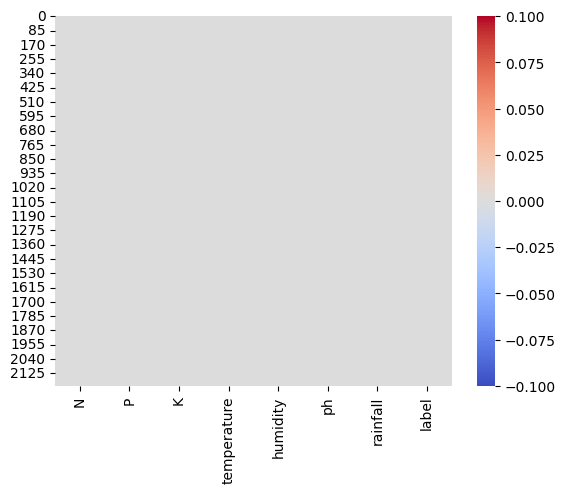

In [ ]:
sns.heatmap(crop.isnull(),cmap="coolwarm")
plt.show()

As you can, there is no missing value in the data, so we do not need to fill these missing values or remove the rows with missing values.
This means that our data is complete!

Here, I created plots to see the distribution of the values of different columns.

<Axes: xlabel='temperature', ylabel='Density'>

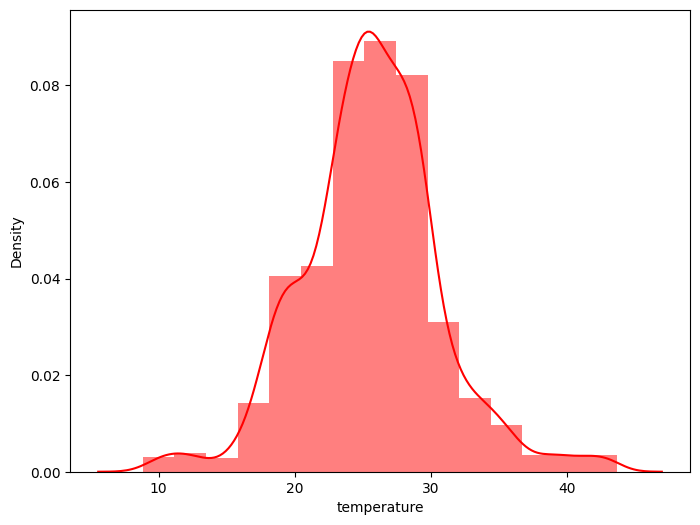

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(crop['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})

***Model Performance***: Normal distributions often represent a balanced distribution of data around the mean, with fewer extreme values in the tails of the distribution. **This can lead to better model performance, as extreme outliers are less likely to skew predictions.** Models trained on normally distributed data may be more stable and robust, providing more reliable predictions.

***Model Complexity***: Normal distributions can simplify model complexity. For instance, **if temperature data is normally distributed, linear models may suffice to capture the relationship between temperature and crop yields effectively.** More complex models might not be necessary unless there are other factors influencing the relationship that are not captured by the normal distribution assumption.

**Effect on Model of Crop Selection:**

A normal distribution of temperature suggests that the majority of temperature values fall within a certain range, making it easier for the model to learn patterns and relationships between temperature and crop selection.
Models trained on data with normal distributions may perform well as they can effectively capture the central tendencies and variations in temperature.
The model can learn to associate specific temperature ranges with optimal crop choices, helping farmers make informed decisions based on prevailing temperature conditions.

<Axes: xlabel='ph', ylabel='Density'>

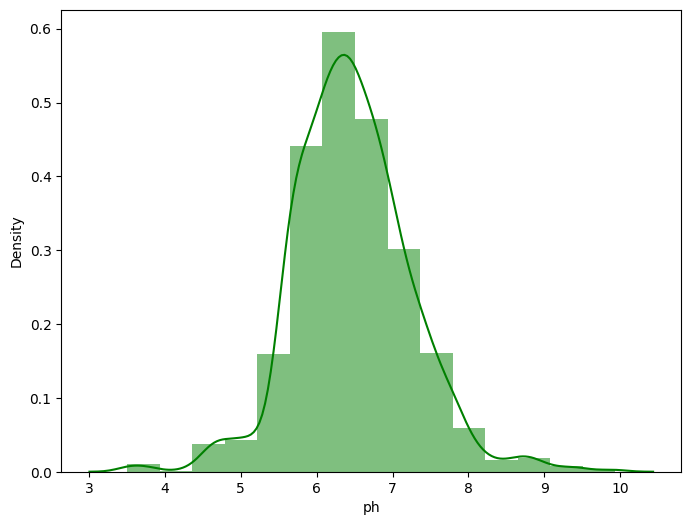

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(crop['ph'],color="green",bins=15,hist_kws={'alpha':0.5})

We can see that the dist of the mentioned features seems to be like normal dist!

<Axes: xlabel='rainfall', ylabel='Density'>

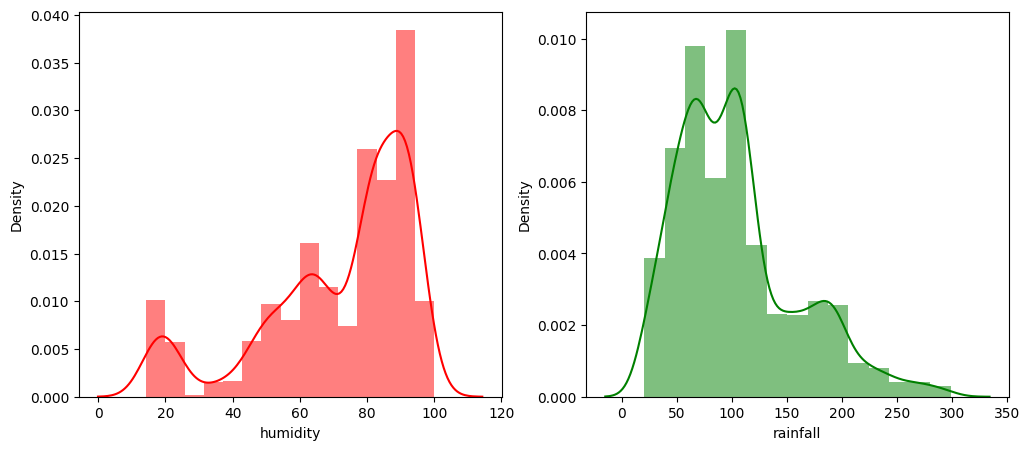

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(crop['humidity'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(crop['rainfall'],color="green",bins=15,hist_kws={'alpha':0.5})

1. **Humidity Distribution** (Left Plot):
   - The distribution of humidity values appears to be skewed towards the lower end of the distribution.
   - Most of the humidity values are concentrated towards the higher end of the scale, indicating that higher humidity levels are more prevalent in the dataset.
   - The distribution has a longer tail towards lower humidity values, suggesting that while higher humidity levels are more common, there are still some instances of lower humidity.

2. **Rainfall Distribution** (Right Plot):
   - The distribution of rainfall values appears to be right-skewed or long-tailed.
   - Most of the rainfall values are concentrated towards the lower end of the scale, indicating that lower rainfall levels are more prevalent in the dataset.
   - However, there are instances of higher rainfall values, as evidenced by the long tail extending towards the higher end of the scale.

- **Model Implications**:
  - Models trained on data with skewed distributions need to be robust enough to handle the varying prevalence of different environmental conditions.
  - Skewed distributions may require additional preprocessing or weighting to ensure that the model accurately captures the relationships between features and crop selection.
  - The long tail in the rainfall distribution suggests that extreme rainfall events may occur infrequently but can still have significant impacts on crop growth and yield. Models need to be able to account for these rare but important events.


<Axes: xlabel='K', ylabel='Density'>

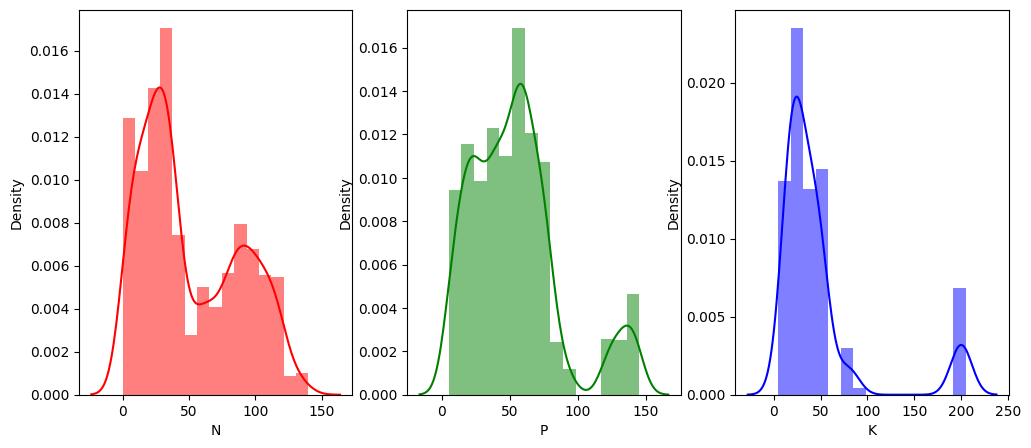

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
sns.distplot(crop['N'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 3, 2)
sns.distplot(crop['P'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 3, 3)
sns.distplot(crop['K'],color="blue",bins=15,hist_kws={'alpha':0.5})

Here, I tried pairplot function. Then function displays scatterplots for all pairs of numerical features in the DataFrame.

**X-axis**: Represents the values of N, K, or P content in the soil.

**Y-axis**: Represents the *density or frequency* of occurrence of different N, K, or P content values.

In contrary, other columns do not seem to have any specific dist type.

We can see that the real range of all of these three features seems similar. I mean although K has some samples with the value of 200, they are just a small part of the distribution.

This is really interesting! We can see the relationship between humidity, rainfall and the best crop to grow in the combination of rainfall and humidity.

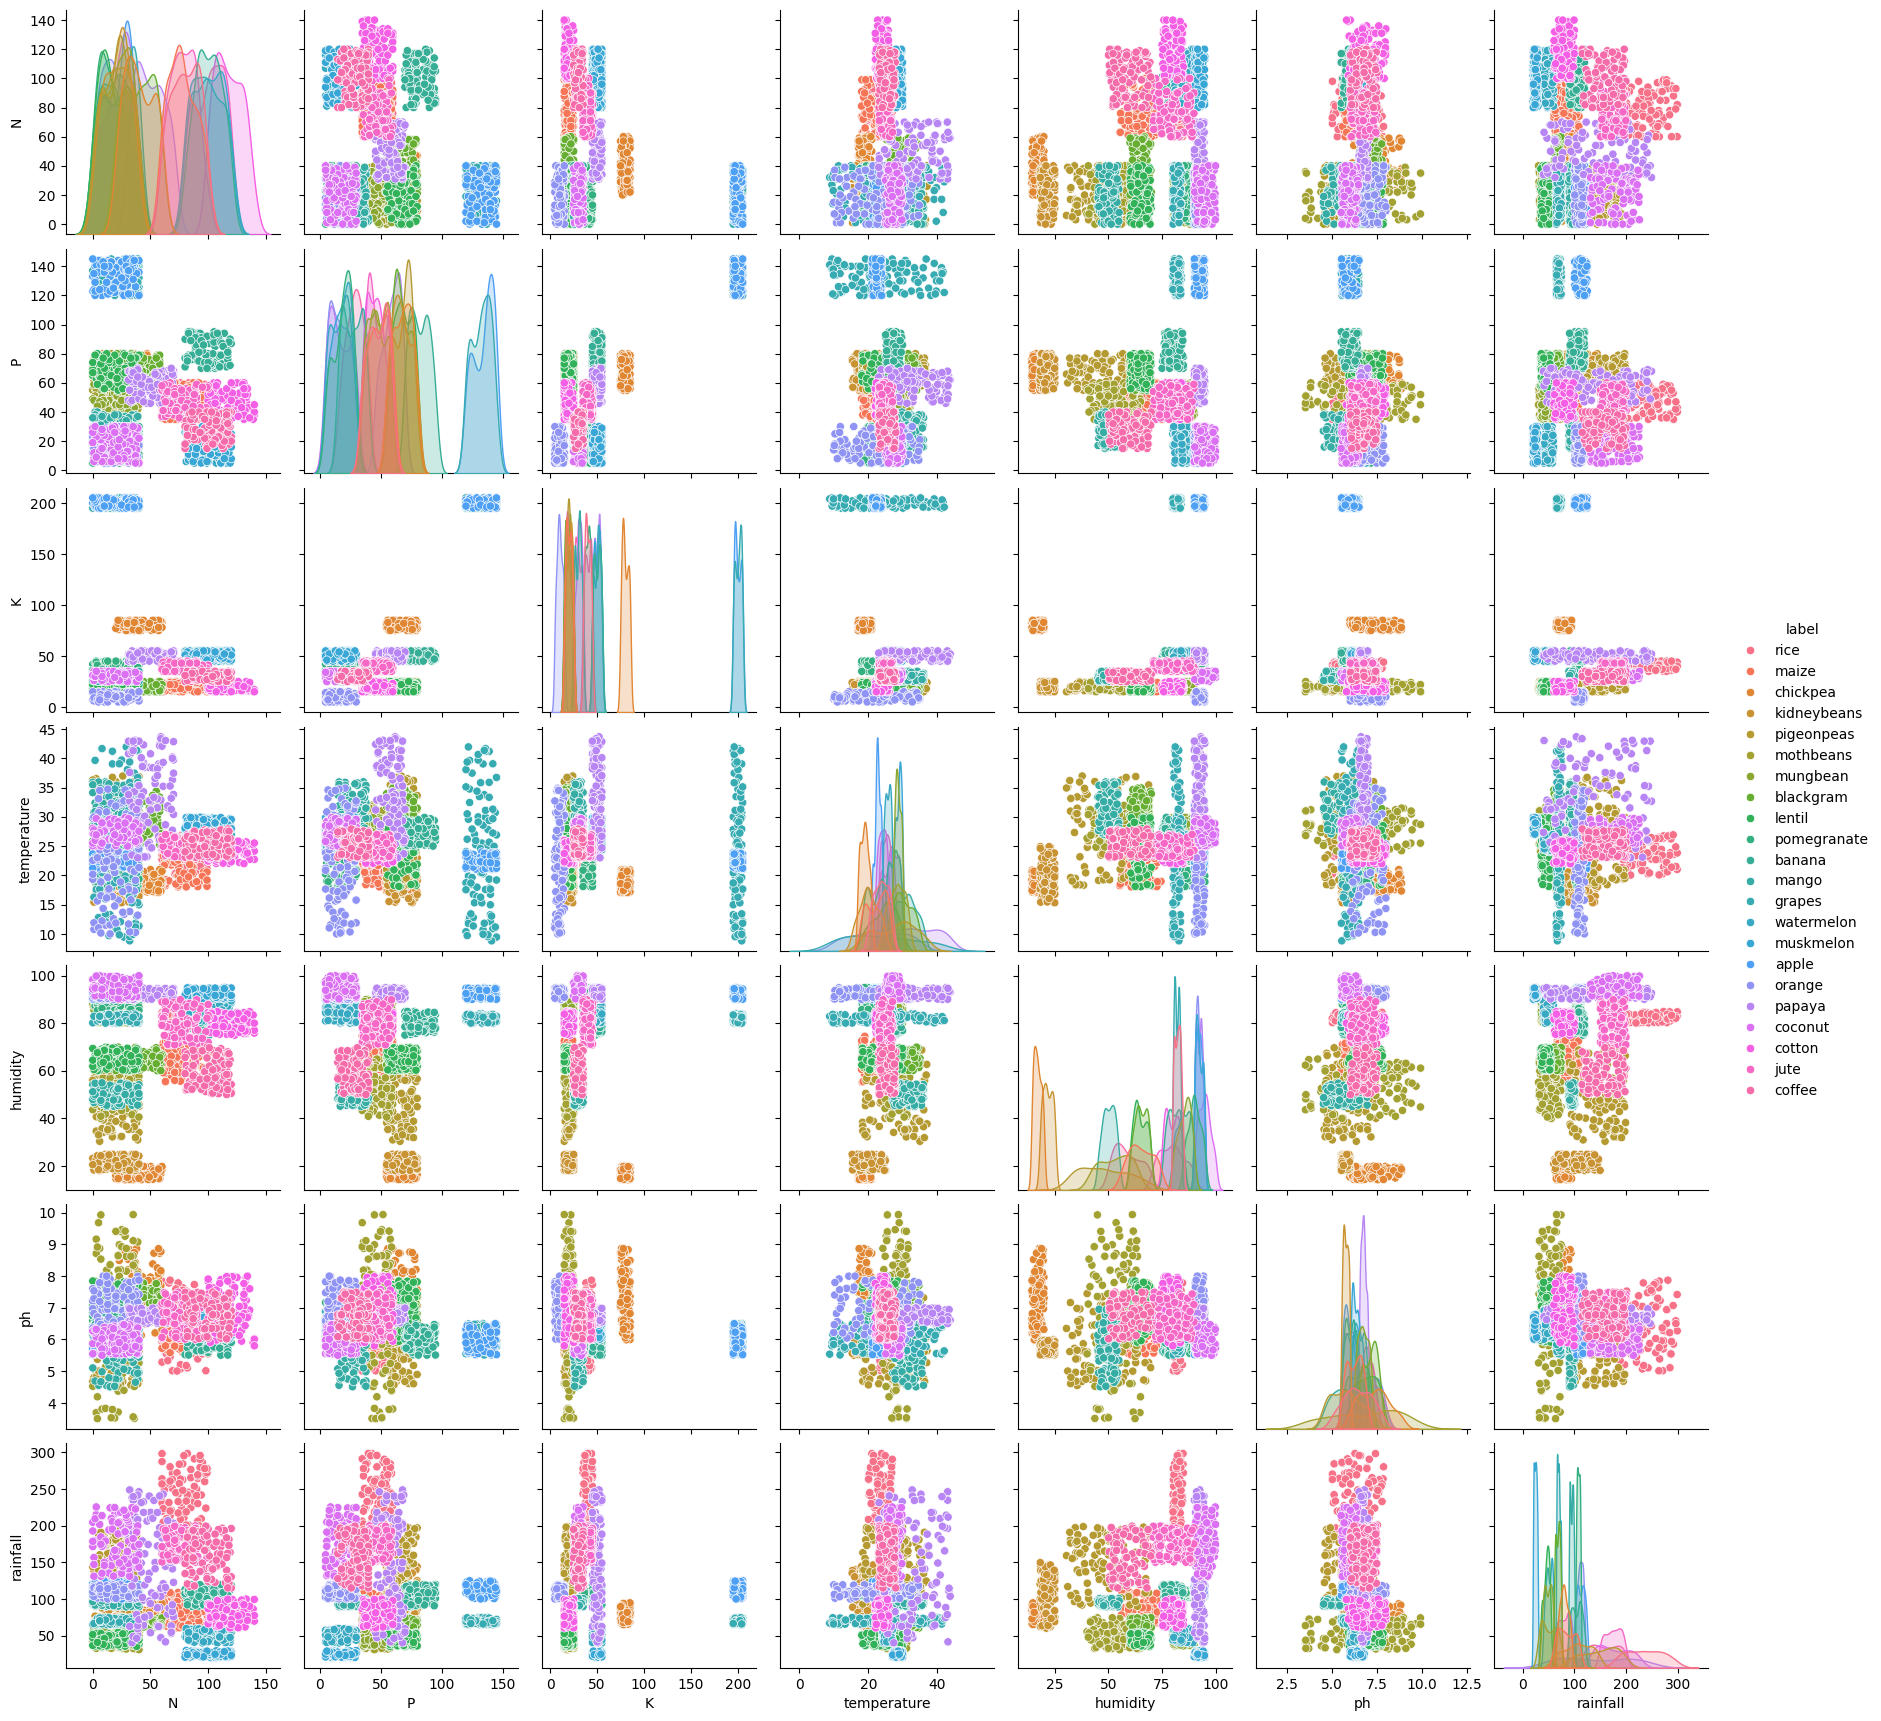

In [ ]:
sns.pairplot(crop,hue = 'label')

The cells in the main diameter of the matrix show the distribution of the values for each columns again. However, other cells show the relationship between columns. What we can infere from this is if a specific row has a an imacpt on another one or if there is any relation between two different features.

***N***

Consider the N and N cell of plot, we can see that some plants have almost the same dist of N, and we can say that each crop falls under a specific group. What the models is supposed to learn is sth like this, These groups etc.

***K and P***

Another thing that we can infer is that if for example the vale of K or P is larger that 100, we can say that the there are only few number of suitable crops!

***Temperature***

For the temp feature, we see that most of the crops follow  normal dist behaior toward the temp. However, there is a diffence. Some plants show a larger adaptability to temp. I mean some plant are able to be grown in various temps, while some others have a specific range of temp that is the best for them.

***Humidity***

In humidity, again, we see that there a number of groups of plants, meaning that each group of them accept the same reange of humidity.

***PH***

PH's similar behavior is similar to temp, as we saw on earlier distribution plots. The overall dist is normal and plants usuall hae a normal distribution for this feature, with different ranges!

***Rainfall***

We see that most plant have a normal distribution of Rainfall. I mean they mostly prefer a rainfall value around the mean of their dist.


***Other things to consider!***

Overall, this a really important plot! We can see the relation of each two featres to the type of crop. In fact, the plot shows the favored range of each two features for a specific plant!

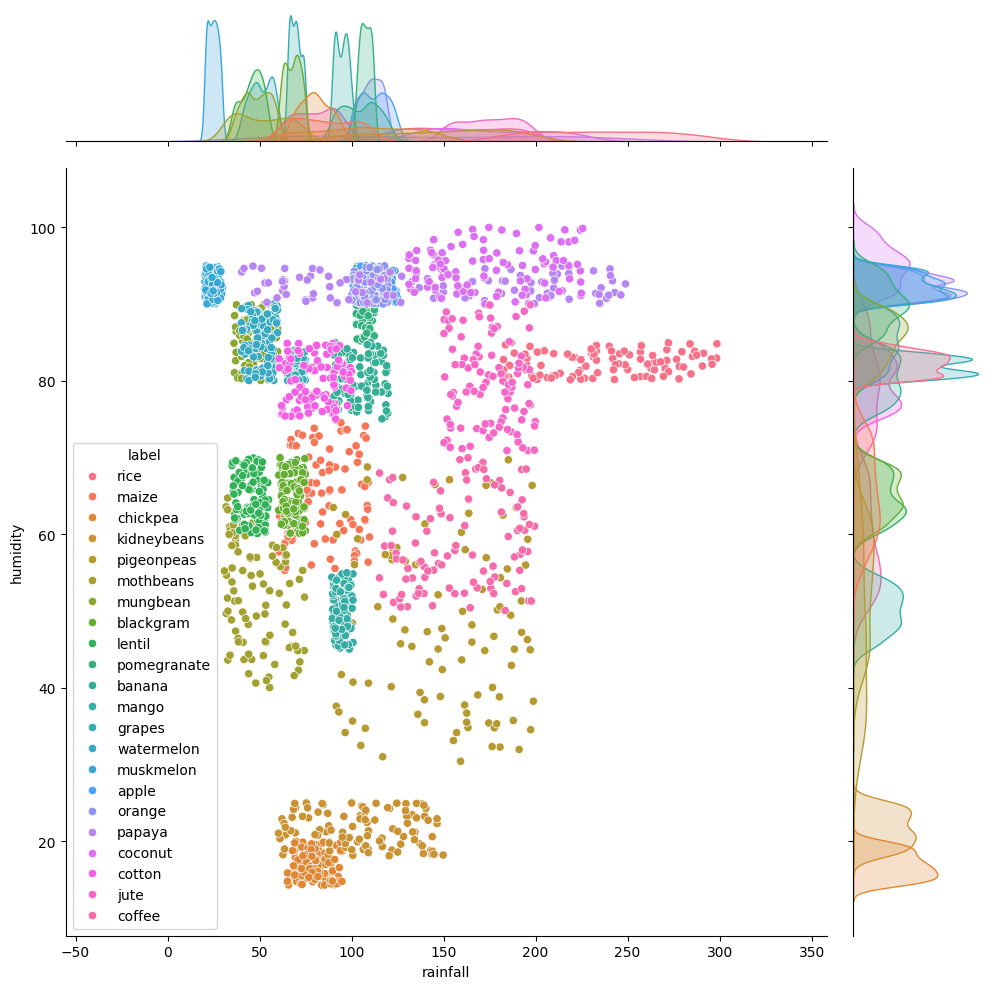

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=crop,height=10,hue="label")

From the joint plot displaying the relationship between rainfall and humidity, along with the differentiation of crops based on their labels, several inferences can be made:

1. **Cluster Patterns**:
   - There are clusters of data points in different regions of the plot, indicating different combinations of rainfall and humidity levels.
   - These clusters suggest that certain ranges of rainfall and humidity are more common in the dataset.

2. **Crop Distribution**:
   - Different crop labels are represented by different colors in the plot.
   - The distribution of colors across the plot indicates how different crops are distributed in relation to rainfall and humidity levels.
   - We can observe whether certain crops tend to prefer specific combinations of rainfall and humidity.

3. **Preferred Conditions for Crops**:
   - The joint plot allows us to infer the preferred environmental conditions for different crops.
   - Crops that are densely clustered in certain regions of the plot may indicate their preferred ranges of rainfall and humidity.
   - For example, if a particular crop label is predominantly clustered in an area of high rainfall and high humidity, it suggests that the crop thrives in such conditions.

4. **Outliers**:
   - Outliers, represented by individual data points that are far from the main clusters, may indicate unusual or extreme environmental conditions.
   - Understanding the presence of outliers can provide insights into the resilience of different crops to extreme weather conditions.

5. **Correlation**:
   - The overall pattern of data points in the plot can provide insights into the correlation between rainfall and humidity.
   - For example, if data points tend to cluster in a diagonal pattern from the bottom-left to the top-right of the plot, it suggests a positive correlation between rainfall and humidity.

### Box Plotss

***We have seen the histograms, why do we need to take a look at box plots?***


Histograms and box plots serve different purposes in data visualization, and combining them can provide a more comprehensive understanding of the distribution of a feature. Here's how a box plot can complement a histogram plot:

1. **Summary Statistics**:
   - While histograms provide a visual representation of the distribution of a feature, box plots summarize key statistics such as the median, quartiles, and potential outliers.
   - Box plots provide a concise summary of the central tendency, spread, and shape of the distribution, making it easier to quickly assess these characteristics compared to histograms.

2. **Outlier Detection**:
   - Box plots visually identify potential outliers in the data, which may not be immediately apparent from histograms.
   - Outliers, if present, are represented as individual points beyond the whiskers of the box plot, making them easy to identify.

3. **Comparison Across Categories**:
   - If the data is categorized (e.g., by different crop labels), box plots allow for easy comparison of the distribution of the feature across categories.
   - By plotting multiple box plots side by side, we can compare the central tendency, spread, and variability of the feature across different categories more efficiently than with histograms alone.

4. **Clearer Visualization**:
   - Box plots are particularly useful when dealing with large datasets or multiple categories, as they provide a more compact and informative visualization compared to histograms.
   - Box plots help to reduce visual clutter and provide a clearer representation of the distribution of the feature, especially when there are many data points or categories to consider.

In summary, while histograms provide a detailed view of the distribution of a feature, box plots offer a concise summary of key statistics and facilitate comparisons across categories. Combining histograms with box plots enhances our understanding of the data distribution by providing both detailed and summary-level insights.

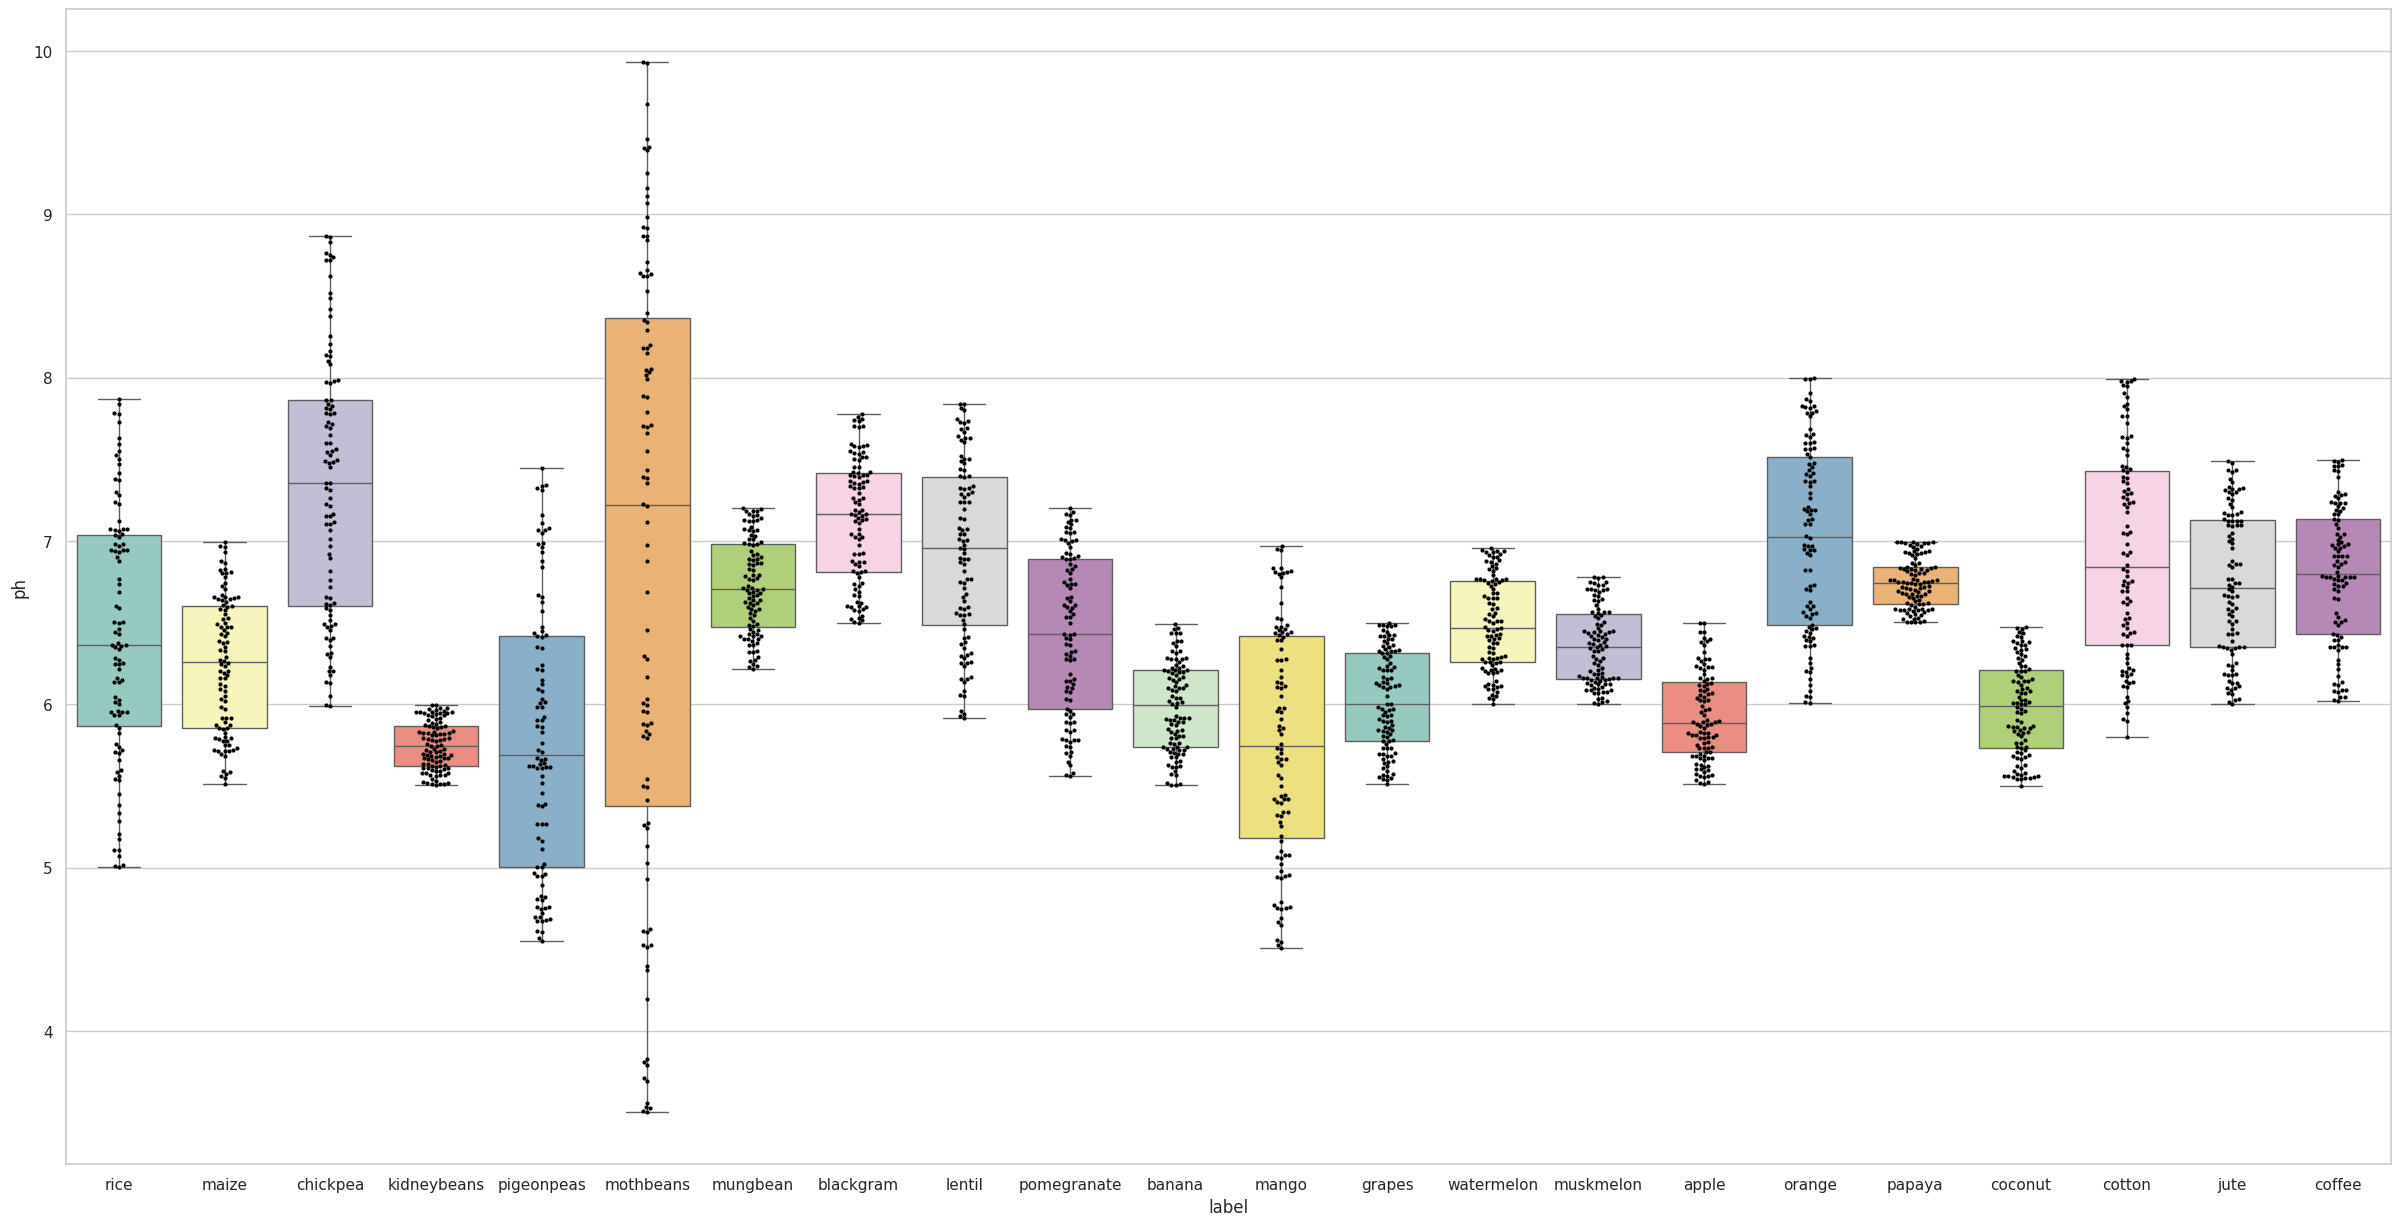

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Assuming 'label' and 'ph' are columns in your 'crop' DataFrame
fig, ax = plt.subplots(figsize=(30, 15))

# Create a box plot with different colors for each 'label'
sns.boxplot(x='label', y='ph', data=crop, palette='Set3', ax=ax)

# Add individual data points using swarmplot
sns.swarmplot(x='label', y='ph', data=crop, color='black', size=3, ax=ax)

plt.show()

* The x-axis will represent different categories or labels from the 'label' column of the dataset.
* The y-axis will represent the values from the 'ph' column of the dataset.
* The boxplot will provide information about the distribution of pH values for each category. It includes details such as the median, quartiles, and potential outliers.



By analyzing the boxplot, we can gain insights into the central tendency, spread, and variability of pH values across different categories in the dataset. Additionally, we can [identify any potential outliers](https://www.jmp.com/en_be/statistics-knowledge-portal/exploratory-data-analysis/box-plot.html#:~:text=Box%20plots%20highlight%20outliers,and%20fall%20beyond%20the%20whiskers.) or differences in the distribution of pH values among the categories.

We can see that most plants box plots are centered around 6 to 8. However, various plants show different ranges of suitable PH. For example, ***moth bean*** has the largest range of suitable PH, while ***Papaya*** has a really small range of suitable Ph. This mean that moth bean is more adaptable to various ranges of PH, or in other words, **it is not a really challengeing factor when we want to decide whether grow moth bean or not!**

We can do the same thing for other features as well!

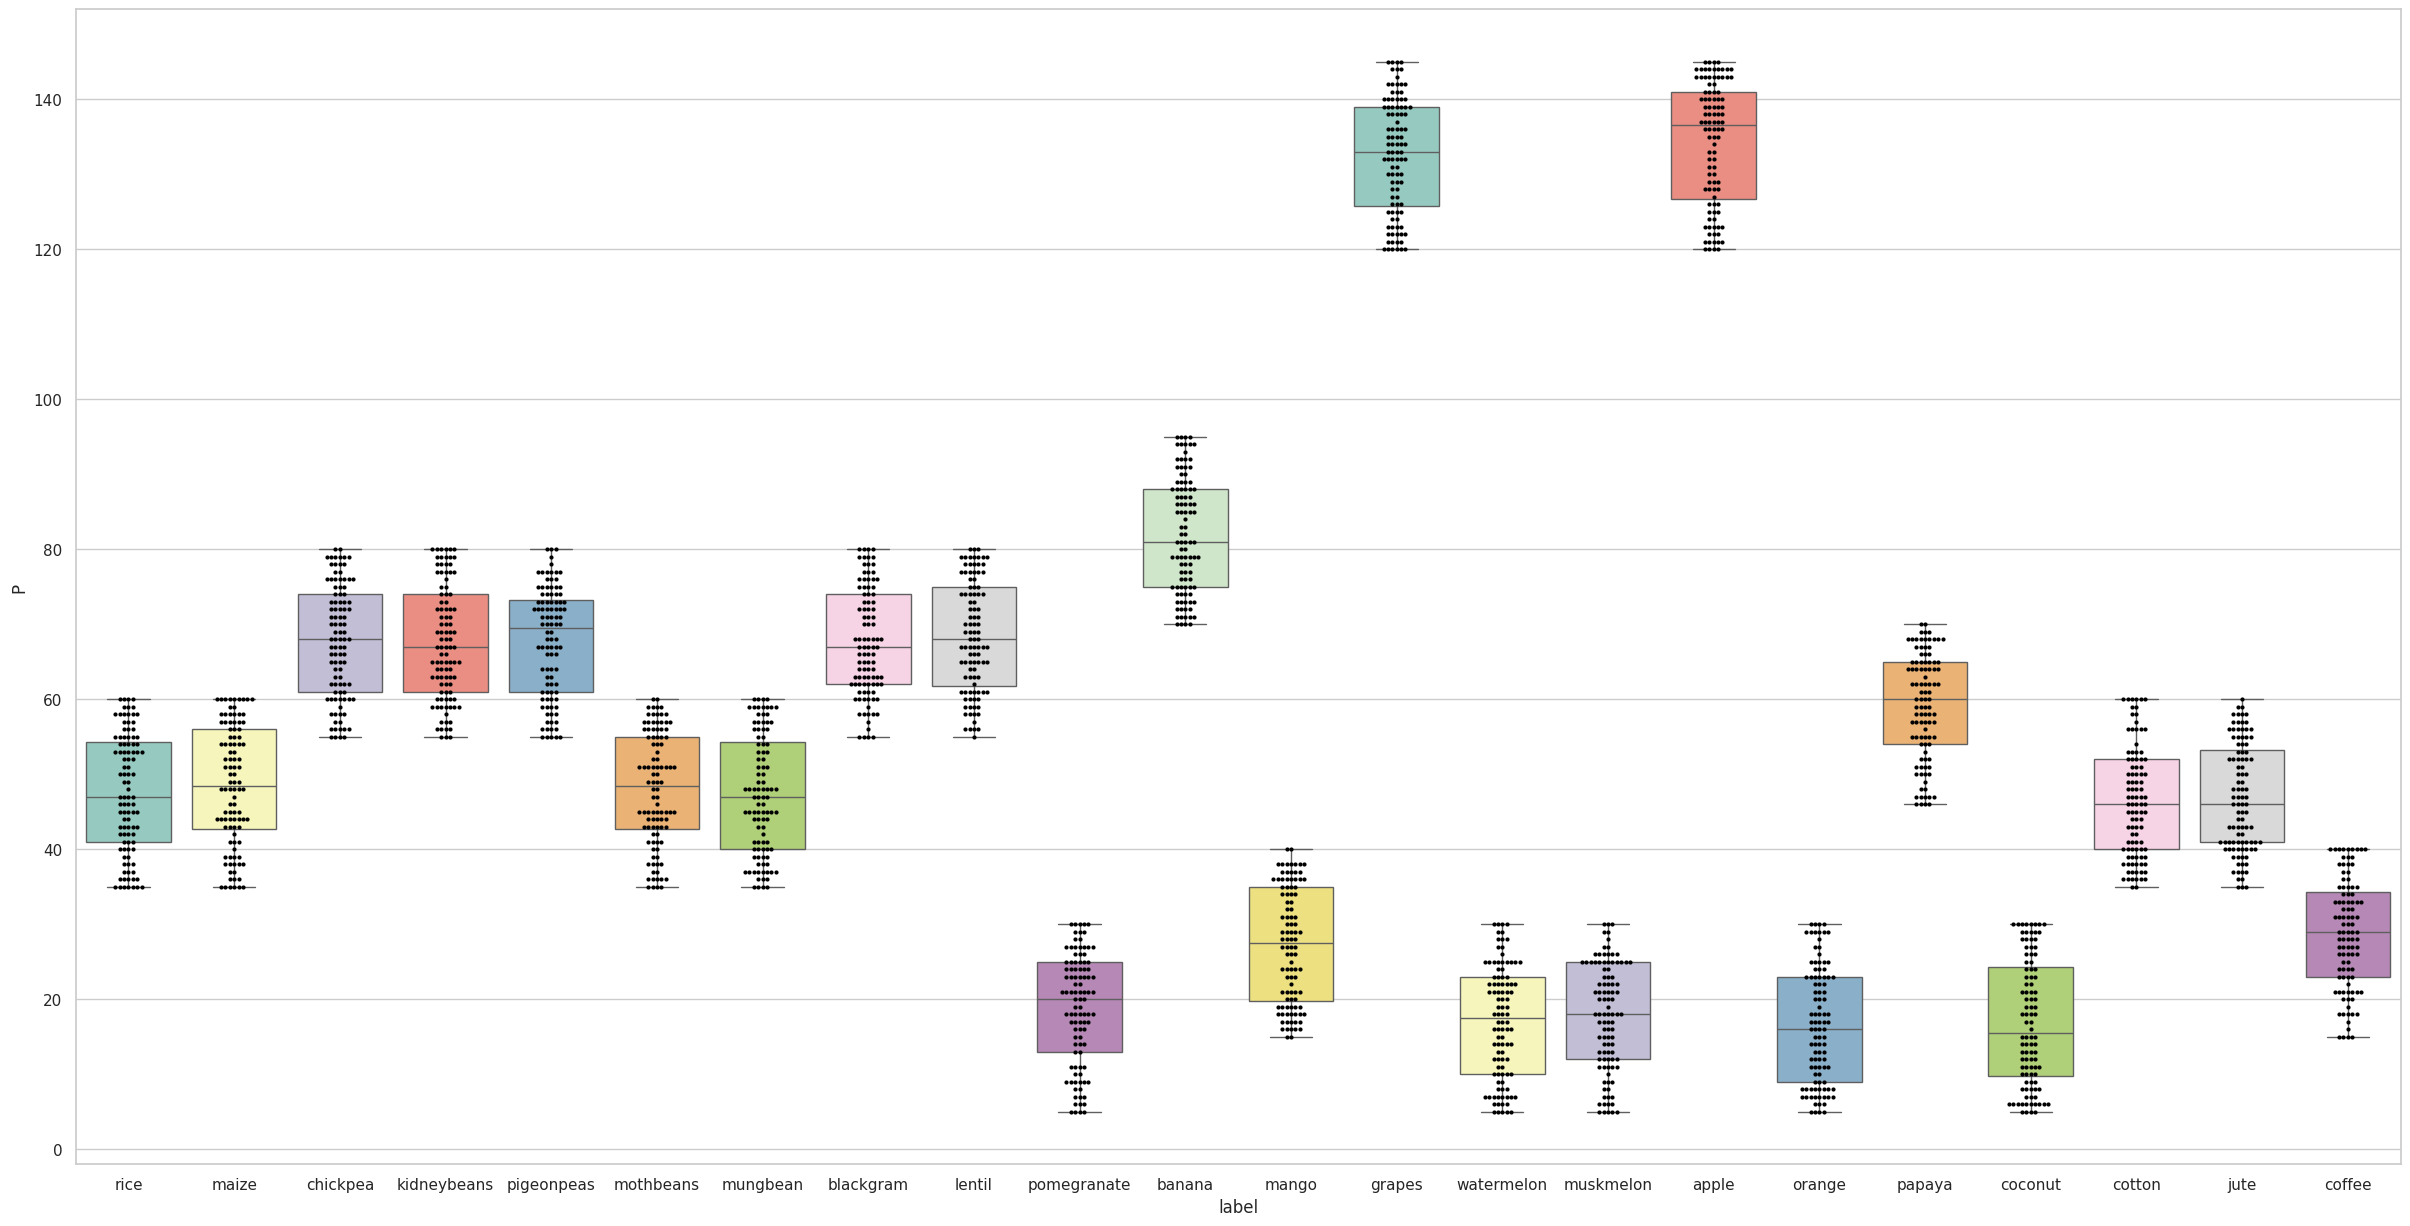

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Assuming 'label' and 'p' are columns in your 'crop' DataFrame
fig, ax = plt.subplots(figsize=(30, 15))

# Create a box plot with different colors for each 'label'
sns.boxplot(x='label', y='P', data=crop, palette='Set3', ax=ax)

# Add individual data points using swarmplot
sns.swarmplot(x='label', y='P', data=crop, color='black', size=3, ax=ax)

plt.show()

Different Plants show various range of a cceptable P, meaning that it has great impact on selecting the best plant to grow. We have to consider this feature when decisding with a higher priority.

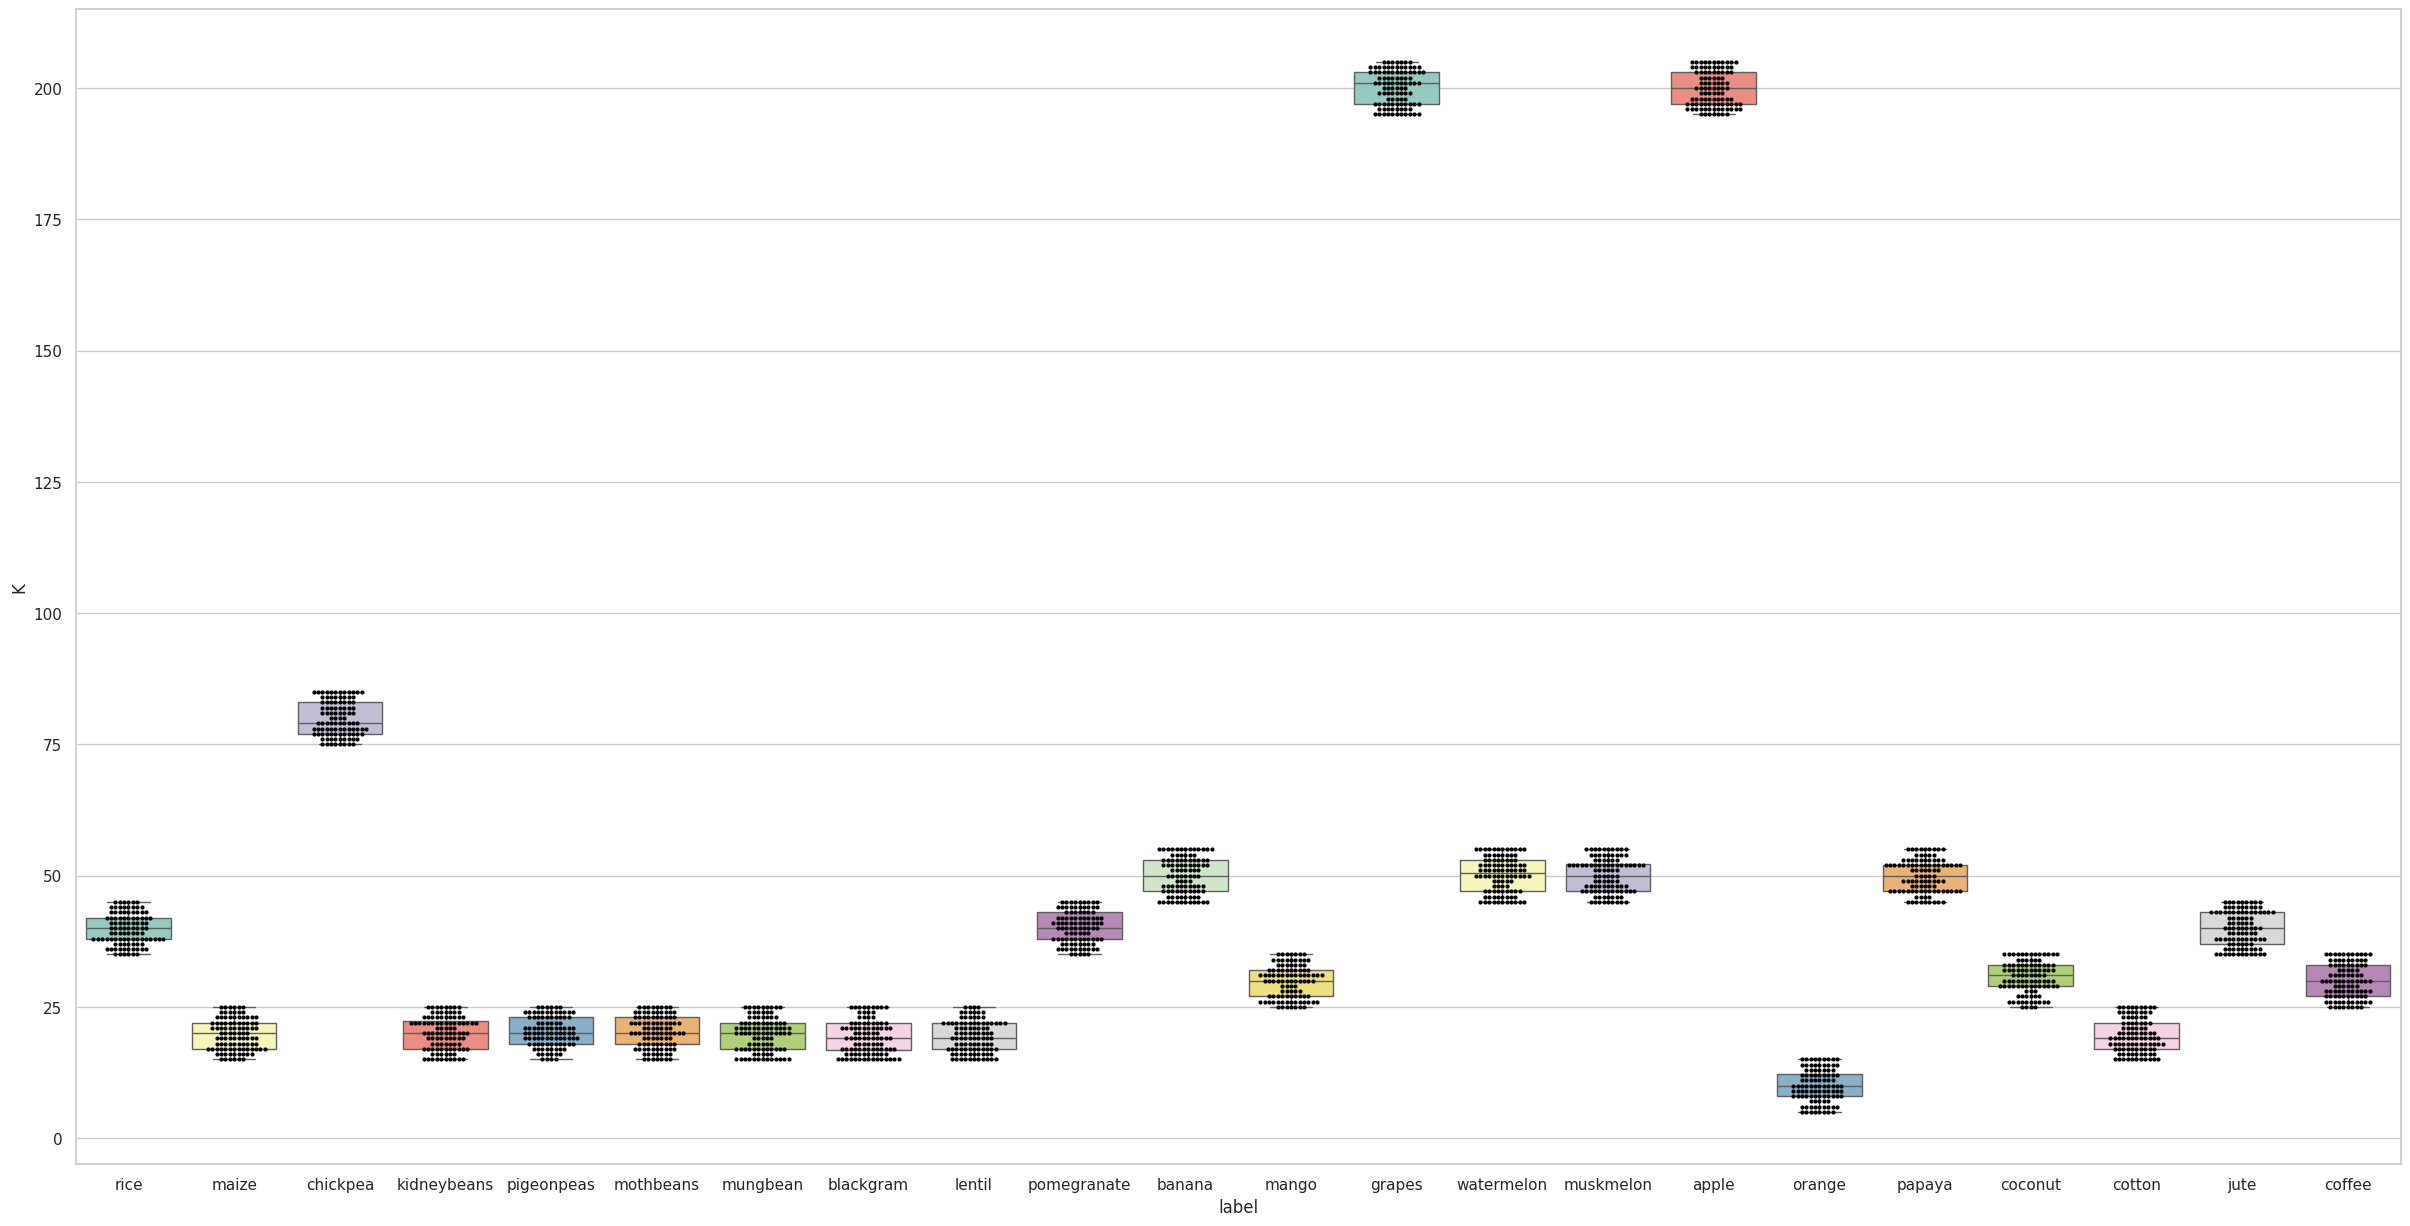

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Assuming 'label' and 'k' are columns in your 'crop' DataFrame
fig, ax = plt.subplots(figsize=(30, 15))

# Create a box plot with different colors for each 'label'
sns.boxplot(x='label', y='K', data=crop, palette='Set3', ax=ax)

# Add individual data points using swarmplot
sns.swarmplot(x='label', y='K', data=crop, color='black', size=3, ax=ax)

plt.show()

There are a number of groups. Some plants have almost the same box plots. If we only consider K, we will find only a number of possible plants to grow.

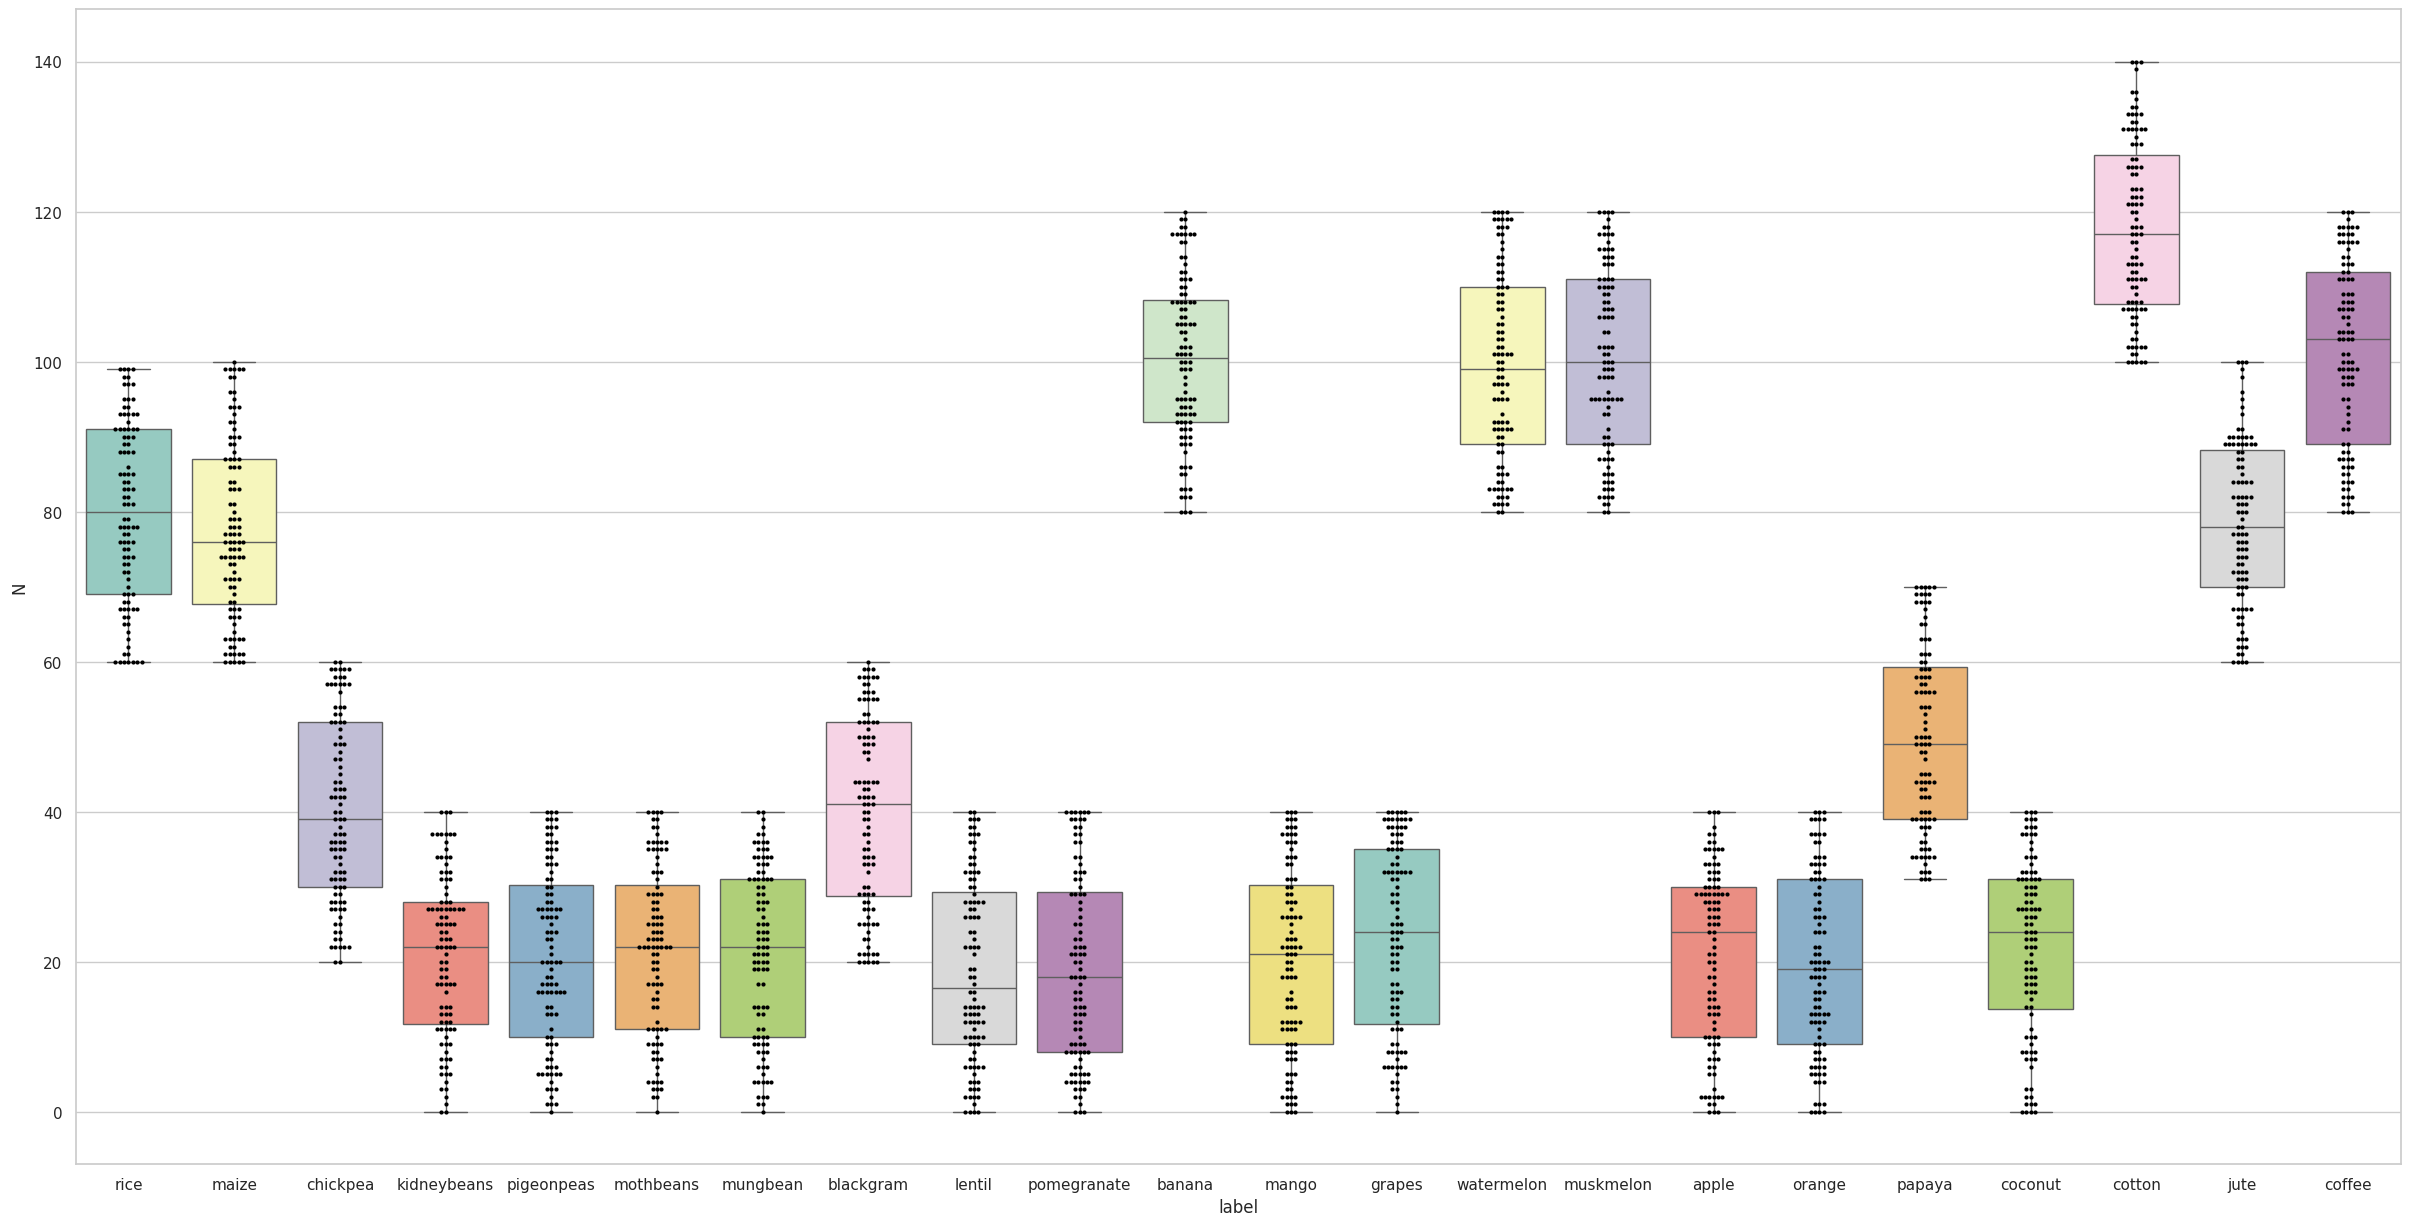

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Assuming 'label' and 'N' are columns in your 'crop' DataFrame
fig, ax = plt.subplots(figsize=(30, 15))

# Create a box plot with different colors for each 'label'
sns.boxplot(x='label', y='N', data=crop, palette='Set3', ax=ax)

# Add individual data points using swarmplot
sns.swarmplot(x='label', y='N', data=crop, color='black', size=3, ax=ax)

plt.show()

A large porportion of plants's box plots with respect to K are centered around 20. This means that if for exmple we have a soil with this density of K more options that the soil with the density of 120!

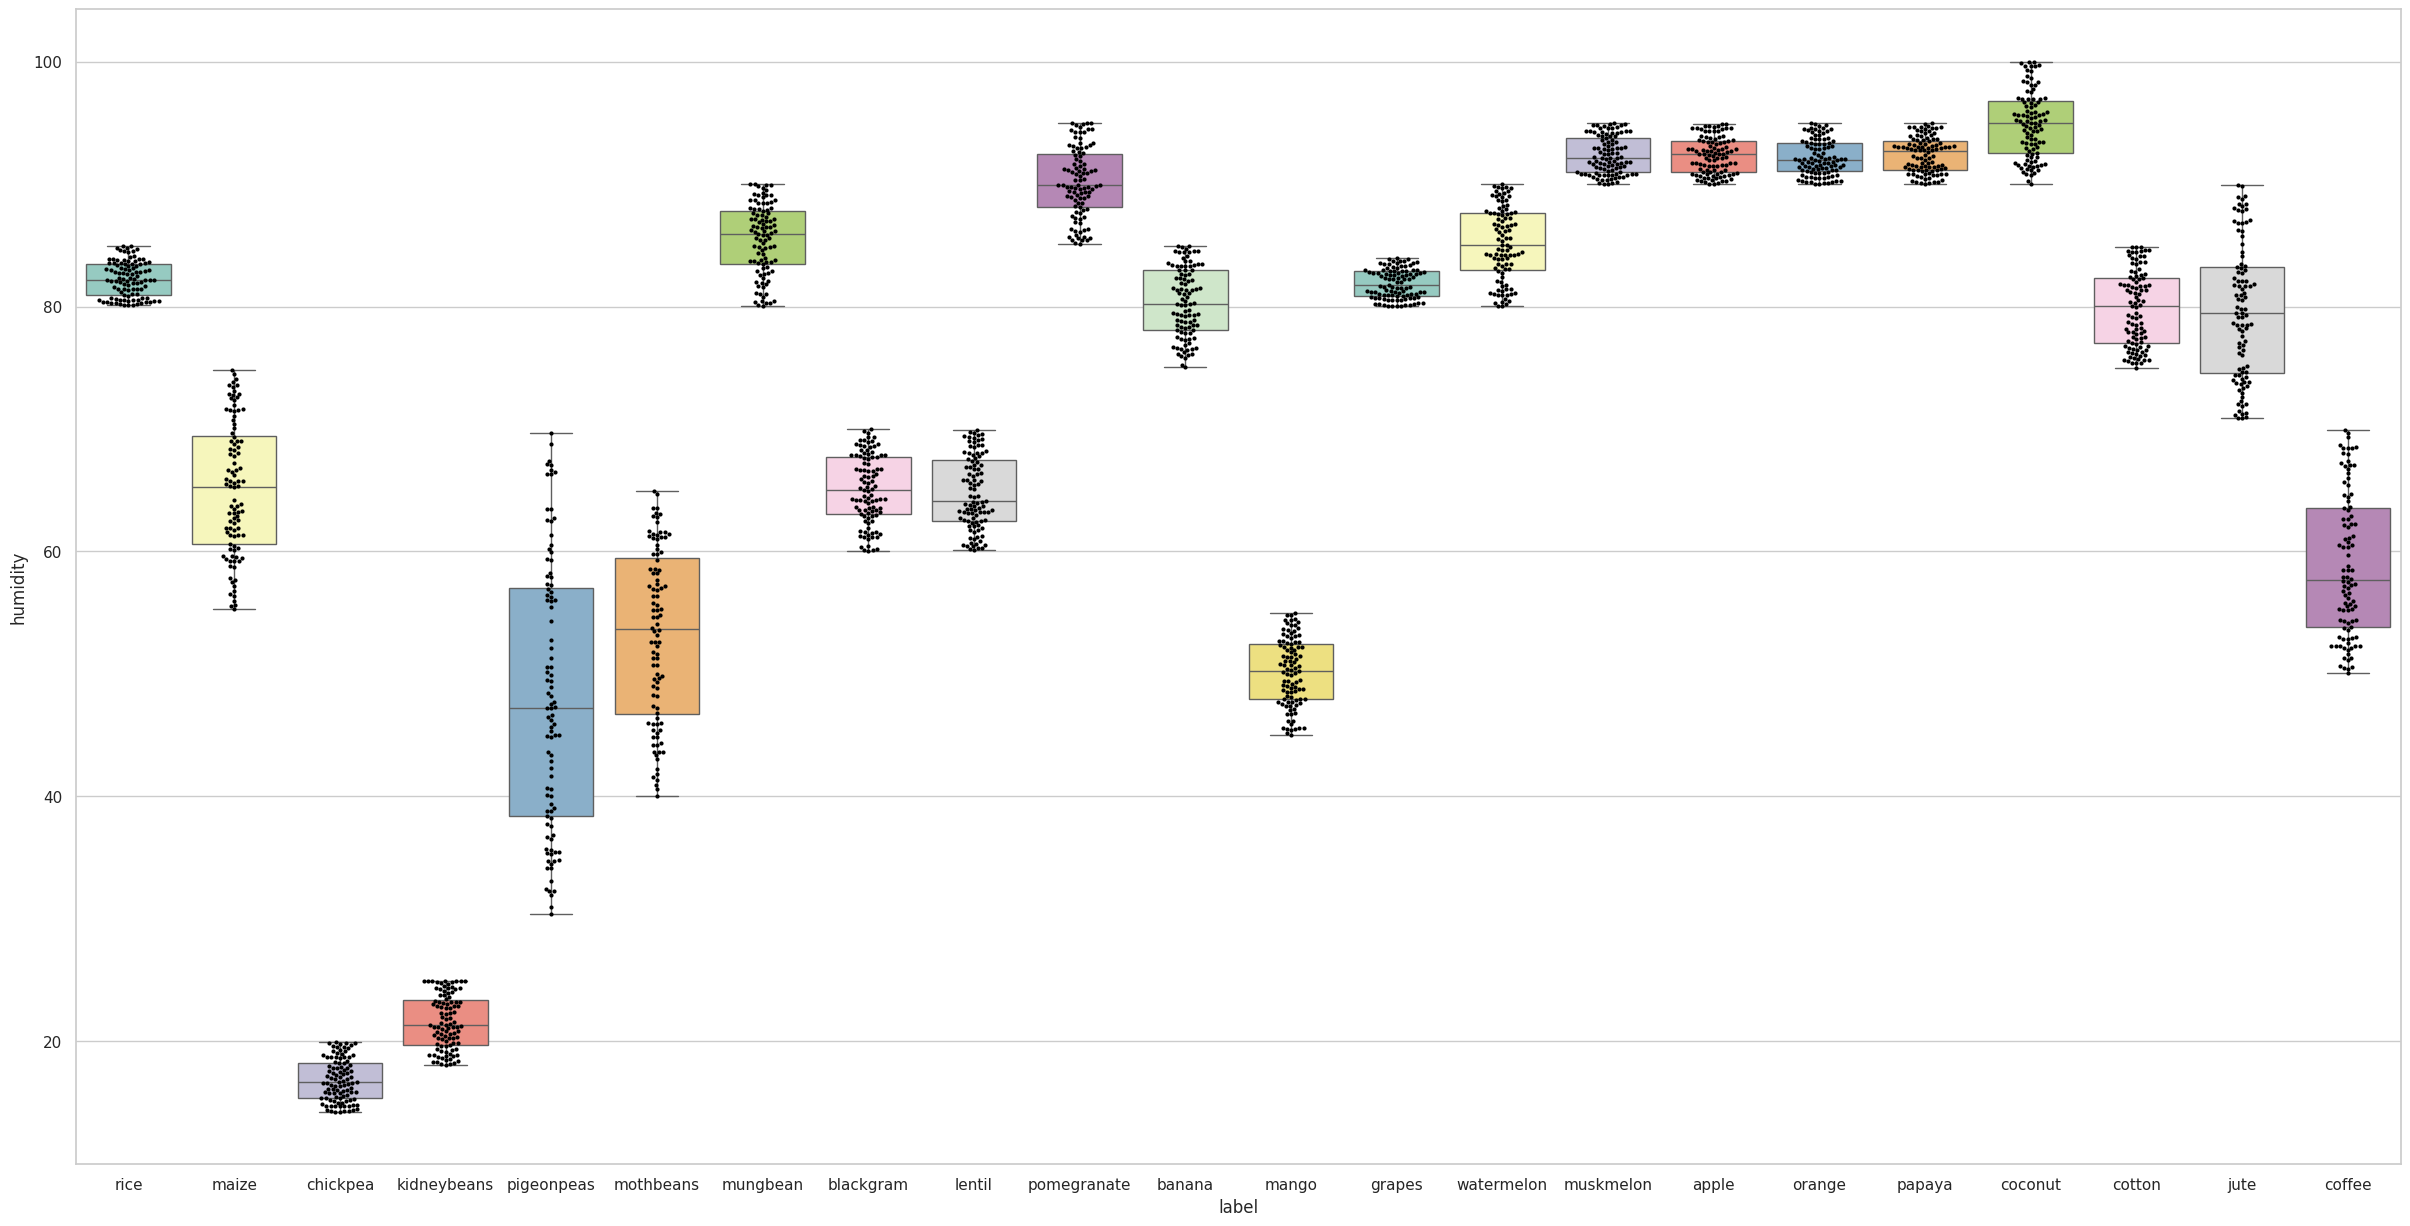

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Assuming 'label' and 'humidity' are columns in your 'crop' DataFrame
fig, ax = plt.subplots(figsize=(30, 15))

# Create a box plot with different colors for each 'label'
sns.boxplot(x='label', y='humidity', data=crop, palette='Set3', ax=ax)

# Add individual data points using swarmplot
sns.swarmplot(x='label', y='humidity', data=crop, color='black', size=3, ax=ax)

plt.show()

Various plants show various suitable reanges of humidity! The centers of box plots are around different values as well.

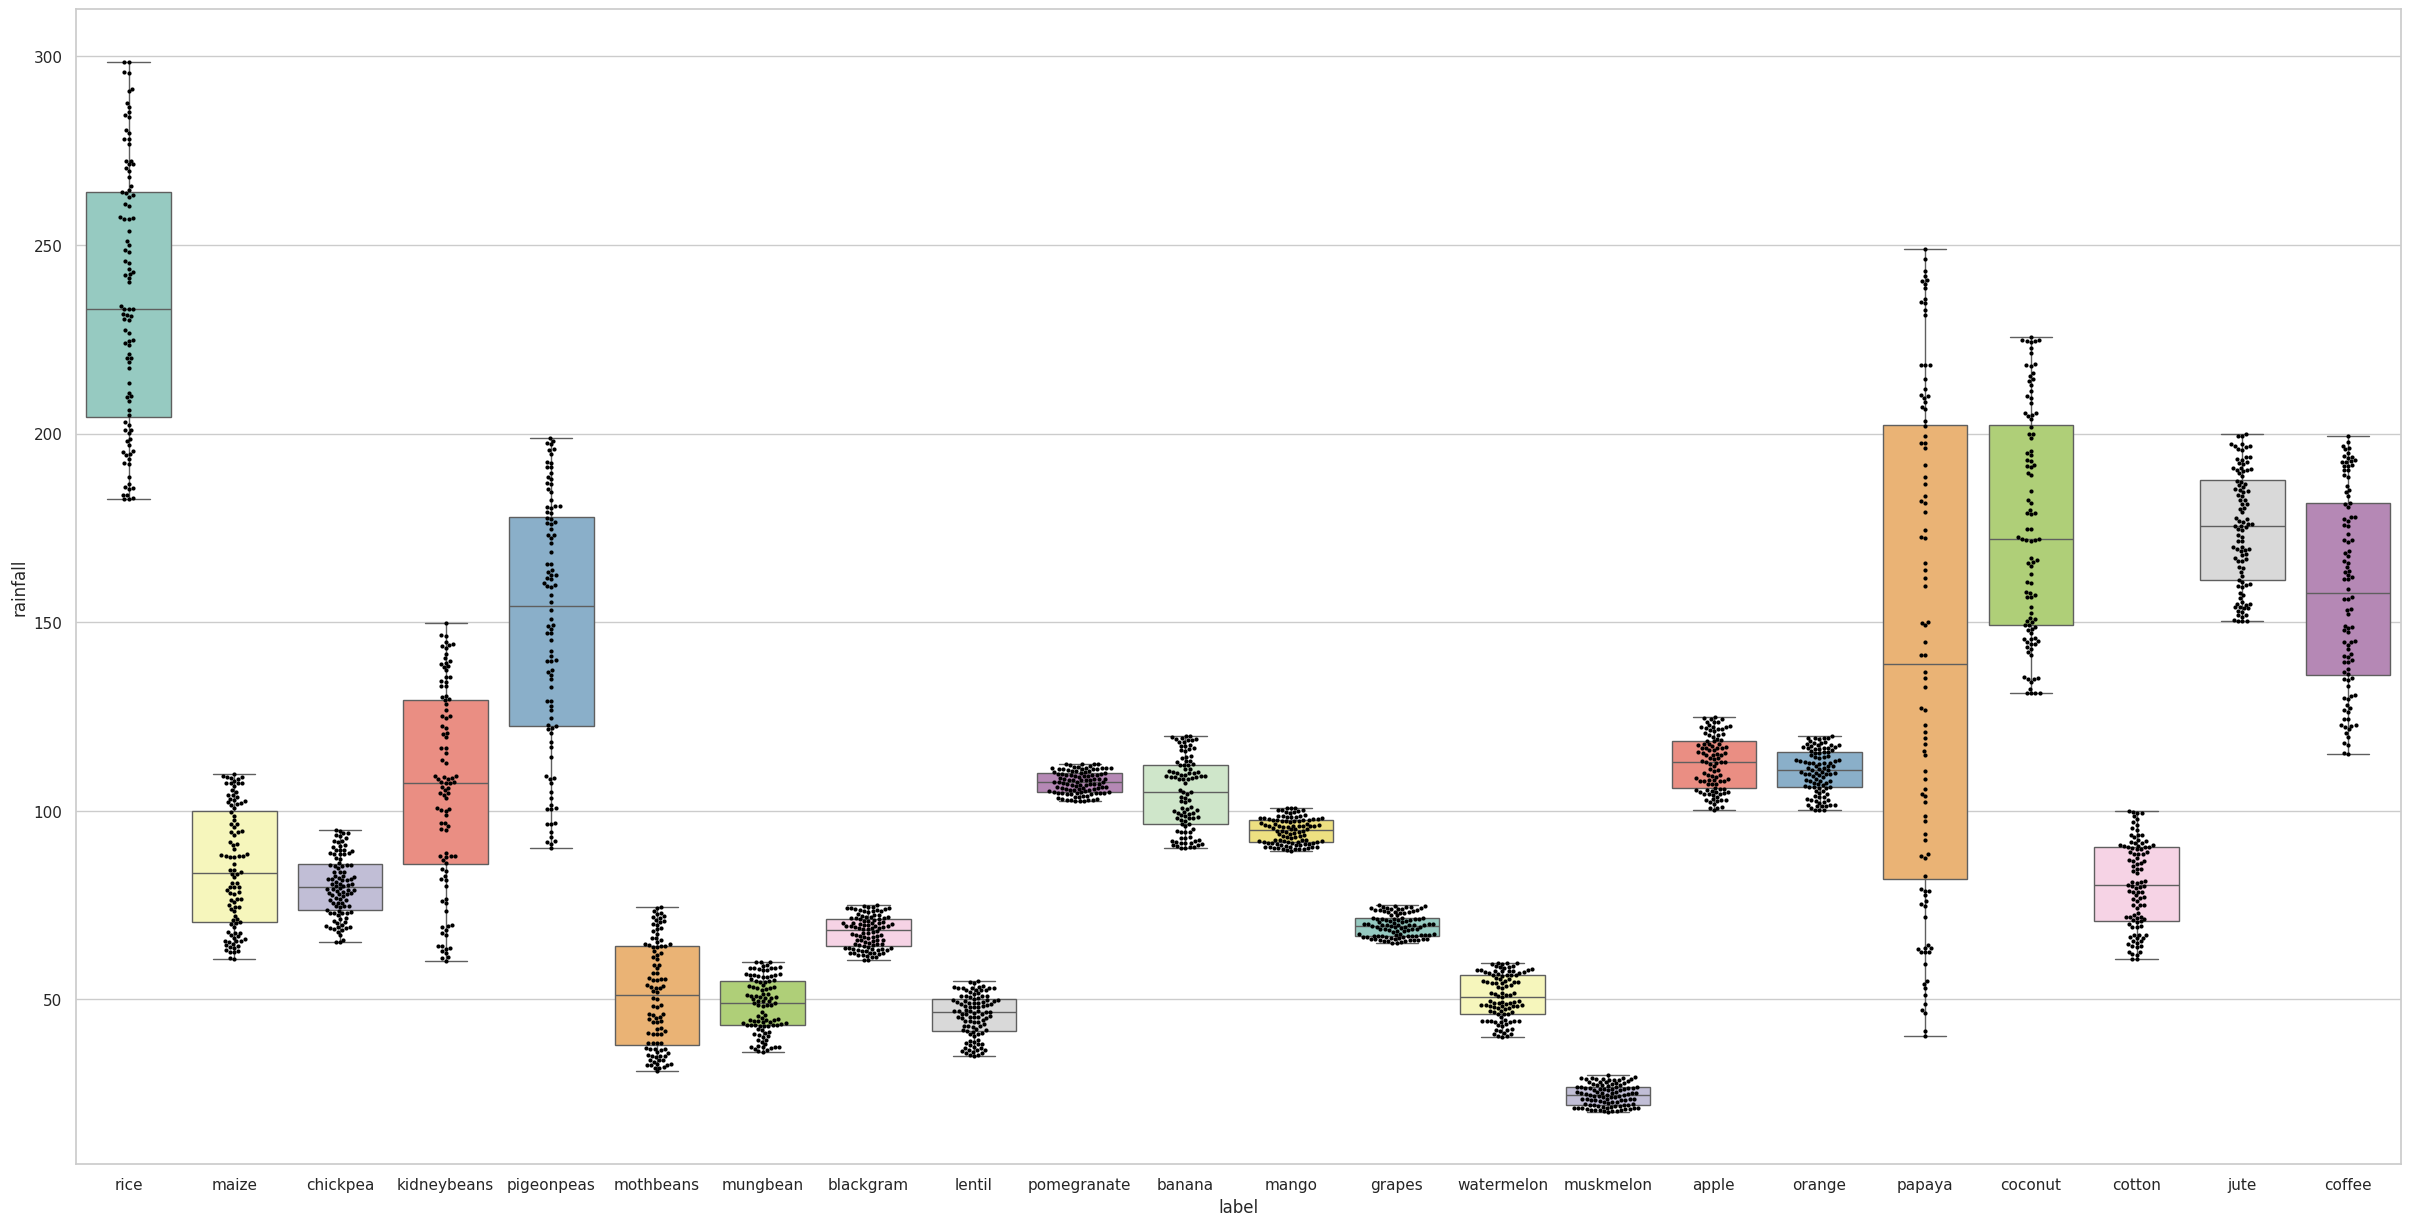

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Assuming 'label' and 'rainfall' are columns in your 'crop' DataFrame
fig, ax = plt.subplots(figsize=(30, 15))

# Create a box plot with different colors for each 'label'
sns.boxplot(x='label', y='rainfall', data=crop, palette='Set3', ax=ax)

# Add individual data points using swarmplot
sns.swarmplot(x='label', y='rainfall', data=crop, color='black', size=3, ax=ax)

plt.show()

While Papaya could not adapt to pH level. However, we see that it can be grow in soils with various ranges of rainfall. While moth bean, which showed a great adaptability to ph is not able to be grown in soils with different rainfall levels!

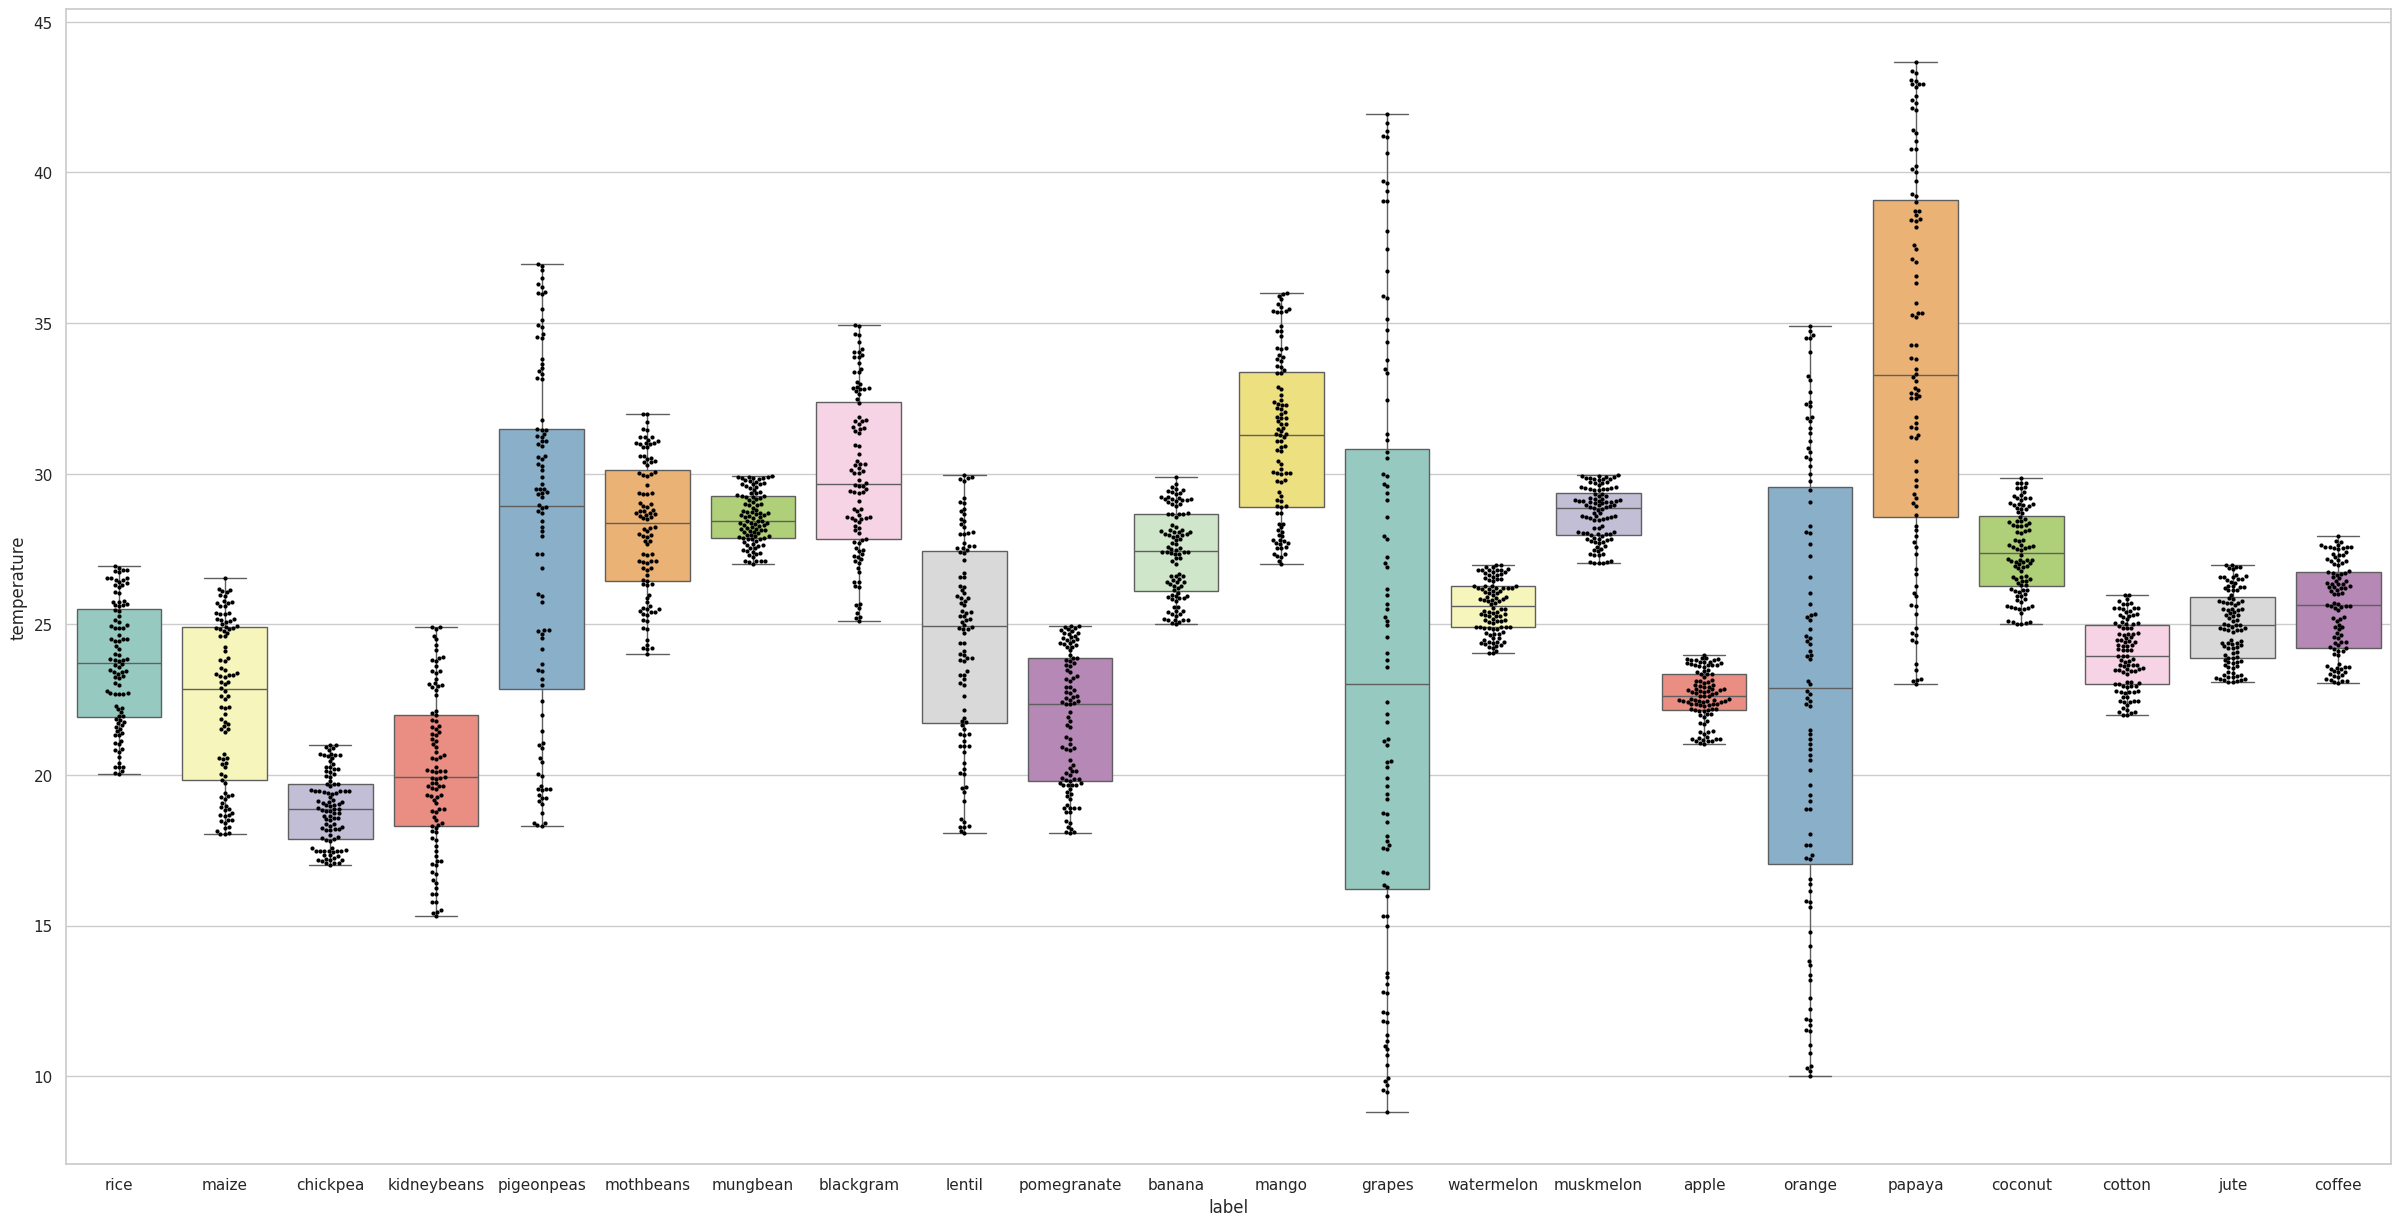

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Assuming 'label' and 'temparature' are columns in your 'crop' DataFrame
fig, ax = plt.subplots(figsize=(30, 15))

# Create a box plot with different colors for each 'label'
sns.boxplot(x='label', y='temperature', data=crop, palette='Set3', ax=ax)

# Add individual data points using swarmplot
sns.swarmplot(x='label', y='temperature', data=crop, color='black', size=3, ax=ax)

plt.show()

Like ph. some plants are more adaptable ot temp ranges.

### Rest of EDA


This code uses the matplotlib and seaborn libraries in Python to create a heatmap of the correlation matrix of a DataFrame named crop.

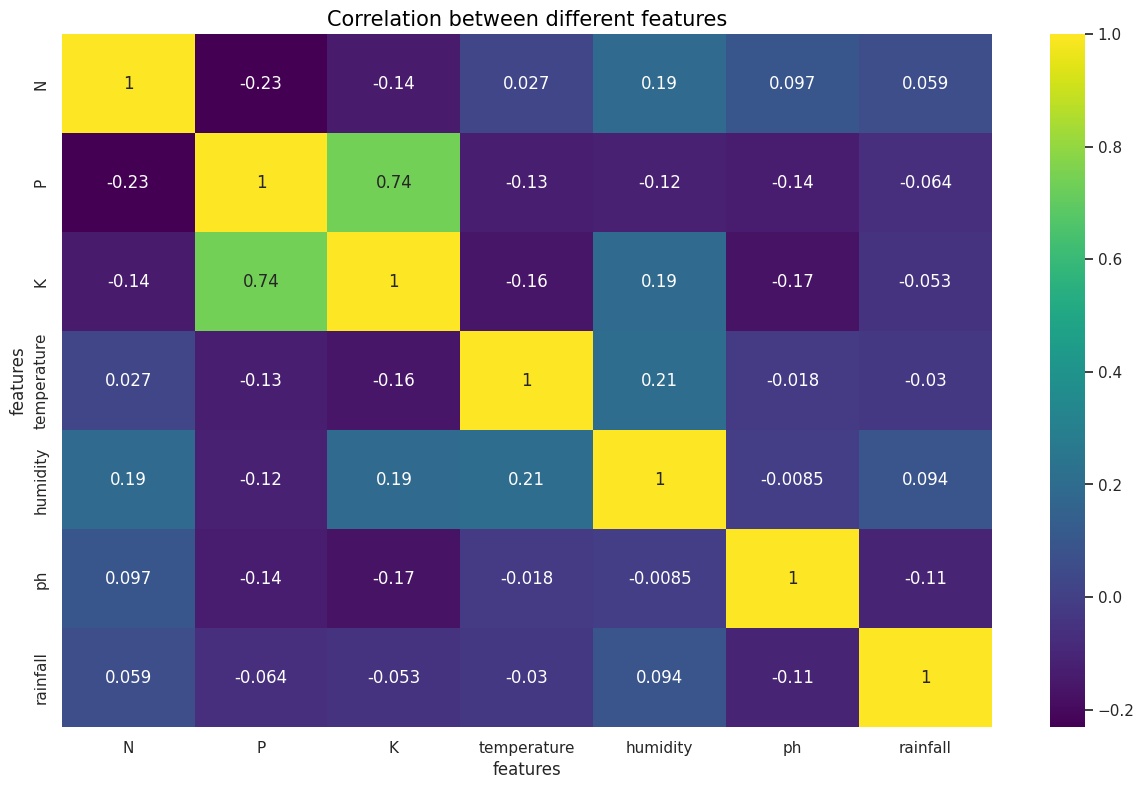

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

The heatmap visually represents the correlation between different features in the crop DataFrame. The color intensity indicates the strength and direction of the correlation. Positive correlations are shown in one color, while negative correlations are shown in another color. The annotations provide the exact correlation coefficient values.

By analyzing the heatmap, we can gain insights into which features are strongly correlated, positively or negatively, which can be valuable in understanding relationships between variables in our dataset. Strong correlations might suggest that changes in one feature are associated with changes in another, providing potential insights for further analysis or modeling.


In the context of correlation, negative correlation indicates that as one variable increases, the other variable tends to decrease

***What the values mean in our specific task!?***

It means that we can not for example consider P without considering K when deciding. Overall, it shows that if there is high density of sth or a feature has a large value, what other features we have to consider as well. In fact, which features have to have a small value or a large value!

For example, N and P have a negative correlation, a strong one among the correlations in our dataset, this means that plants that are suitable to be grown in soils with a great density of N can not probably tolerate a high density of P or at least they do not need!

The average value of each feature for each crop! This gives us some insights about the best approzimate conditions for each crop.

In [ ]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892

The mean of each feature for each crop. If we pass these means, for example, the means of apple to our models, we are expecting to see the apple label as the result!

For example, P is important for fruting plants, and we can see that apple, banana have a high density of P in their soils on average!

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

Again, we can see that for each crop, what is the best combination of NPK to have. Moreover, you can see that if the value of P is too large, we can a few options like apple and grapes. If the amount of K is more in the soil, some other options are ideals, and so on!

# **Feature Selection**

In [ ]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [ ]:
feature_names = ['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.15, random_state=0, stratify=target)

1. **Random State**: The random_state parameter is set to 0, ensuring that the data split is reproducible. This means that if the code is run multiple times with the same random_state value, the same split will be obtained each time.

2. **Stratification**: The stratify parameter is set to target, ensuring that the class distribution is preserved in both the training and testing sets. This is important, especially if the dataset has class imbalance, as it ensures that each class is represented proportionally in both sets.

# **Modeling Classification algorithms**

$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$

</break>

$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$

</break>

$\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$

</break>

$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}$

1. **K-Nearest Neighbors (KNN):**
   - **Accuracy:** KNN can perform well if the data is well-structured and doesn't have a high dimensionality. However, it might not be the best choice for large datasets due to its computational cost during prediction.
   - **Interpretability:** KNN is relatively easy to understand as it relies on proximity to determine class labels. Interpretability is moderate.
   - **Scalability:** KNN suffers from scalability issues, especially with large datasets, as it requires storing the entire dataset for prediction.
   - **Suitability:** Suitable for small to medium-sized datasets with low dimensionality.

2. **Decision Tree:**
   - **Accuracy:** Decision trees can handle both numerical and categorical data, making them versatile. They are prone to overfitting, but techniques like pruning can mitigate this issue.
   - **Interpretability:** Decision trees offer high interpretability, as the rules for classification are easy to understand and visualize.
   - **Scalability:** Decision trees are relatively scalable and can handle large datasets efficiently.
   - **Suitability:** Suitable for datasets with both numerical and categorical features, and when interpretability is important.

3. **Random Forest:**
   - **Accuracy:** Random Forests generally offer high accuracy by combining multiple decision trees, which reduces overfitting.
   - **Interpretability:** While not as interpretable as single decision trees, Random Forests still provide some insight into feature importance.
   - **Scalability:** Random Forests can handle large datasets and are parallelizable, making them scalable.
   - **Suitability:** Suitable for high-dimensional datasets with a mix of numerical and categorical features, where high accuracy is desired.

4. **Naive Bayes:**
   - **Accuracy:** Naive Bayes assumes that features are independent, which may not always hold true in real-world scenarios. However, it's computationally efficient and can perform well, especially with text classification tasks.
   - **Interpretability:** Naive Bayes models are highly interpretable, as they are based on simple probabilistic principles.
   - **Scalability:** Naive Bayes is highly scalable and works well with large datasets.
   - **Suitability:** Suitable for text classification tasks or datasets where the independence assumption holds reasonably well.

5. **Logistic Regression:**
   - **Accuracy:** Logistic Regression is a simple yet effective algorithm for binary classification tasks. It performs well when the relationship between the features and target variable is linear.
   - **Interpretability:** Highly interpretable, as it directly provides the coefficients of features, indicating their importance.
   - **Scalability:** Logistic Regression is highly scalable and efficient for large datasets.
   - **Suitability:** Suitable for binary classification tasks and when interpretability is crucial.


## **K-Nearest Neighbors**

Here I trained different models for each inidvidual feature. The result shows the importance of each feature and the effect of them on the models outputs. In fact, when deciding what to grow, what are most imortant things to consider at first!
Nest, I craeted a polit that show how well each of the created model perform for each label class! This is another important thing to keep in mind. It shows that for each type of plant what are most effecting features. Thefore, it won't be reasonable to grow BANANA if the K is low, and so on.

Next, we will see the same thing for other models as well.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert NumPy arrays to DataFrames
x_train_df = pd.DataFrame(x_train, columns=feature_names)
x_test_df = pd.DataFrame(x_test, columns=feature_names)

# Initialize lists to store results
feature_accuracies = {}
class_accuracies = {}

# Iterate over each feature
for feature_name in feature_names:
    # Extracting individual feature
    x_train_feature = x_train_df[[feature_name]]
    x_test_feature = x_test_df[[feature_name]]

    # Train KNN classifier on individual feature
    knn_feature = KNeighborsClassifier()
    knn_feature.fit(x_train_feature, y_train)

    # Predict using the model
    predicted_values_feature = knn_feature.predict(x_test_feature)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_values_feature)
    feature_accuracies[feature_name] = accuracy

    # Calculate accuracy for each class
    class_accuracy = classification_report(y_test, predicted_values_feature, output_dict=True)
    class_accuracies[feature_name] = class_accuracy

    print(f"Accuracy for Feature {feature_name}: {accuracy}")

Accuracy for Feature N: 0.1484848484848485
Accuracy for Feature P: 0.17575757575757575
Accuracy for Feature K: 0.30303030303030304
Accuracy for Feature temperature: 0.16666666666666666
Accuracy for Feature humidity: 0.3575757575757576
Accuracy for Feature ph: 0.10606060606060606
Accuracy for Feature rainfall: 0.36363636363636365


In [ ]:
# Print feature importance
print("Feature Importance:")
for feature, accuracy in sorted(feature_accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {accuracy}")

# Print class accuracies for each feature
print("\nClass Accuracies for Each Feature:")
for feature, class_accuracy in class_accuracies.items():
    print(f"\nFeature {feature}:")
    for label, metrics_ in class_accuracy.items():
        if label != 'accuracy':
            print(f"Label {label}: {metrics_['precision']}")

Feature Importance:
rainfall: 0.36363636363636365
humidity: 0.3575757575757576
K: 0.30303030303030304
P: 0.17575757575757575
temperature: 0.16666666666666666
N: 0.1484848484848485
ph: 0.10606060606060606

Class Accuracies for Each Feature:

Feature N:
Label apple: 0.0967741935483871
Label banana: 0.3125
Label blackgram: 0.25
Label chickpea: 0.10714285714285714
Label coconut: 0.1
Label coffee: 0.11538461538461539
Label cotton: 0.38461538461538464
Label grapes: 0.0
Label jute: 0.21052631578947367
Label kidneybeans: 0.0
Label lentil: 0.5
Label maize: 0.09090909090909091
Label mango: 0.13333333333333333
Label mothbeans: 0.18181818181818182
Label mungbean: 0.07142857142857142
Label muskmelon: 0.16666666666666666
Label orange: 0.15789473684210525
Label papaya: 0.1875
Label pigeonpeas: 0.0
Label pomegranate: 0.0
Label rice: 0.1
Label watermelon: 0.125
Label macro avg: 0.14961336124903035
Label weighted avg: 0.14961336124903032

Feature P:
Label apple: 0.3333333333333333
Label banana: 0.407407

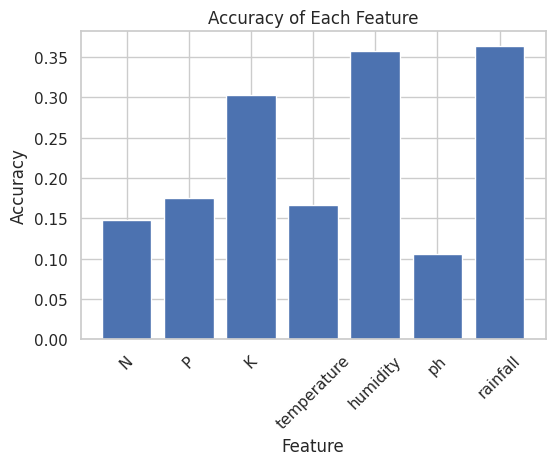

In [ ]:
import matplotlib.pyplot as plt

# Plot for the importance of features
plt.figure(figsize=(6, 4))
plt.bar(feature_accuracies.keys(), feature_accuracies.values())
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Feature')
plt.xticks(rotation=45)
plt.show()

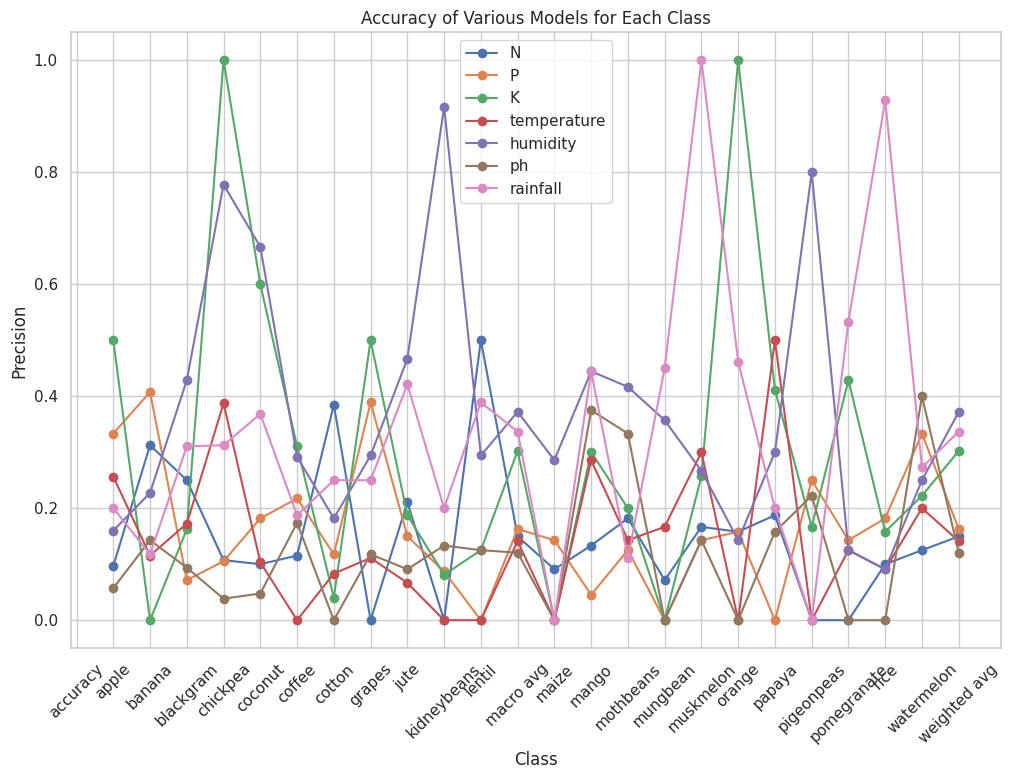

In [ ]:
# Plot for the accuracy of various models for each class
plt.figure(figsize=(12, 8))
for feature, class_accuracy in class_accuracies.items():
    label_precisions = []
    for label in sorted(class_accuracy.keys()):
        if label != 'accuracy':
            label_precisions.append(class_accuracy[label]['precision'])
        else:
            label_precisions.append(np.nan)
    plt.plot(sorted(class_accuracy.keys()), label_precisions, marker='o', label=f'{feature}')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Accuracy of Various Models for Each Class')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The importance of features for recommending the best plant to grow in specific circumstances:

1. **Feature Importance Analysis**:
   - The most important features based on their importance scores (descending order) are: rainfall, humidity, K (potassium), P (phosphorus), temperature, N (nitrogen), and pH.
   - This indicates that rainfall and humidity play the most crucial role in determining the suitability of plants for growth in particular conditions, followed by the availability of essential nutrients like potassium and phosphorus, and then factors like temperature, nitrogen levels, and soil pH.

2. **Relationship between Features and Plant Types**:
   - Different plants have varying sensitivities to different features. For instance:
     - Chickpea, kidney beans, and orange are highly sensitive to potassium levels (Feature K).
     - Chickpea, coconut, kidney beans, and pigeon peas are strongly influenced by humidity.
     - Rice is highly dependent on rainfall, whereas muskmelon is very sensitive to temperature.
   - These observations indicate that certain plants thrive in specific environmental conditions, and understanding these sensitivities can aid in making accurate recommendations.

3. **Feature Sensitivity for Each Plant Type**:
   - Different plants prioritize different features for optimal growth. For example:
     - Cotton is highly sensitive to humidity, followed by potassium (K) and rainfall.
     - Lentil's growth is primarily influenced by nitrogen levels (N), while its sensitivity to other features is relatively low.
     - Grapes show moderate sensitivity to most features, indicating a balanced requirement across multiple environmental factors.

4. **Considerations for Recommendations**:
   - When recommending plants for cultivation:
     - Start by assessing rainfall and humidity levels as they are the most significant factors.
     - Then consider potassium and phosphorus availability in the soil.
     - Temperature, nitrogen levels, and pH can be secondary factors but still crucial for optimal growth.

In summary, understanding the relationship between environmental features and plant types is essential for making accurate recommendations in agricultural settings. By prioritizing and analyzing these features, one can optimize plant selection for specific conditions, leading to improved agricultural outcomes.

1. **Apple**:
   - Most Important Features: Rainfall, Humidity, Temperature, Phosphorus

2. **Banana**:
   - Most Important Features: Rainfall, Humidity, Potassium, Temperature

3. **Blackgram**:
   - Most Important Features: Humidity, Potassium, Rainfall, Temperature

4. **Chickpea**:
   - Most Important Features: Potassium, Humidity, Rainfall, Phosphorus

5. **Coconut**:
   - Most Important Features: Humidity, Potassium, Rainfall, Phosphorus

6. **Coffee**:
   - Most Important Features: Potassium, Humidity, Rainfall, Temperature

7. **Cotton**:
   - Most Important Features: Humidity, Potassium, Rainfall, Phosphorus

8. **Grapes**:
   - Most Important Features: Humidity, Potassium, Rainfall, Phosphorus

9. **Jute**:
   - Most Important Features: Humidity, Potassium, Rainfall, Phosphorus

10. **Kidneybeans**:
    - Most Important Features: Humidity, Potassium, Rainfall, Phosphorus

11. **Lentil**:
    - Most Important Features: Nitrogen, Humidity, Potassium, Rainfall

12. **Maize**:
    - Most Important Features: Potassium, Humidity, Rainfall, Phosphorus

13. **Mango**:
    - Most Important Features: Potassium, Humidity, Rainfall, Temperature

14. **Mothbeans**:
    - Most Important Features: Potassium, Humidity, Rainfall, Phosphorus

15. **Mungbean**:
    - Most Important Features: Humidity, Potassium, Rainfall, Phosphorus

16. **Muskmelon**:
    - Most Important Features: Temperature, Rainfall, Humidity, Potassium

17. **Orange**:
    - Most Important Features: Potassium, Humidity, Rainfall, Phosphorus

18. **Papaya**:
    - Most Important Features: Rainfall, Humidity, Potassium, Phosphorus

19. **Pigeonpeas**:
    - Most Important Features: Potassium, Humidity, Rainfall, Phosphorus

20. **Pomegranate**:
    - Most Important Features: Rainfall, Humidity, Potassium, Phosphorus

21. **Rice**:
    - Most Important Features: Rainfall, Humidity, Potassium, Phosphorus

22. **Watermelon**:
    - Most Important Features: Rainfall, Humidity, Potassium, Phosphorus

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9878787878787879
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        15
        jute       0.93      0.87      0.90        15
 kidneybeans       0.94      1.00      0.97        15
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      1.00      1.00        15
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00      1.00 

**Specific Crop Insights:**
   - 'jute' and 'rice': The model's performance is slightly lower for these crops, with lower precision, recall, and F1-score. Further investigation may be needed to understand and address these specific challenges.

In conclusion, the KNN model appears to be a strong performer for the crop prediction task, with high accuracy and good class-wise performance. However, it's important to explore and understand specific challenges for certain crops (e.g., 'jute' and 'rice') and consider potential improvements or adjustments to address these challenges.

In [ ]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [ ]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.9882352941176471
knn_test_accuracy =  0.9878787878787879


In [ ]:
class_labels = np.unique(y_train)

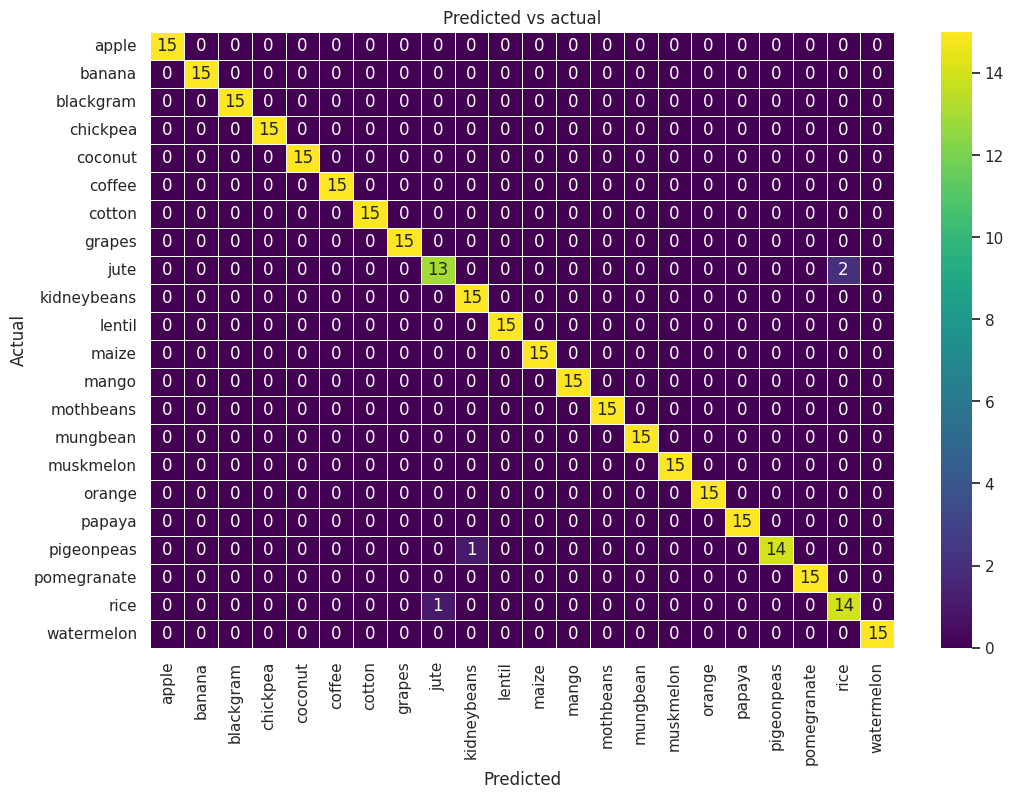

In [ ]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

The confusion matrix provides a summary of the model's performance by breaking down the predictions into four categories: True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN).

The heatmap visualization makes it easy to identify patterns and errors in the model's predictions. For example, you can see which classes are frequently confused and where the model performs well or poorly.

We can also infer that which crop has a simpler relationship between different features. So, Rice is probably the most difficult to predict!

Considering the high overall accuracy and good performance metrics for individual classes, this KNN model seems effective for crop recommendation. However, it's essential to consider the specific requirements and priorities of the recommendation task. Farmers may want to focus on the crops with the highest precision and recall values for their specific conditions.

## **Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Convert NumPy arrays to DataFrames
x_train_df = pd.DataFrame(x_train, columns=feature_names)
x_test_df = pd.DataFrame(x_test, columns=feature_names)

# Initialize Decision Tree classifier
DT = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

# Fit the model
DT.fit(x_train, y_train)

# Predict using the model
predicted_values_DT = DT.predict(x_test)

# Calculate accuracy
accuracy_DT = accuracy_score(y_test, predicted_values_DT)

print("Decision Tree's Accuracy is:", accuracy_DT * 100)

# Classification report
print(classification_report(y_test, predicted_values_DT))

# Initialize lists to store results
feature_accuracies_DT = {}
class_accuracies_DT = {}

# Iterate over each feature
for feature_name in feature_names:
    # Extracting individual feature
    x_train_feature = x_train_df[[feature_name]]
    x_test_feature = x_test_df[[feature_name]]

    # Train Decision Tree classifier on individual feature
    DT_feature = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
    DT_feature.fit(x_train_feature, y_train)

    # Predict using the model
    predicted_values_feature_DT = DT_feature.predict(x_test_feature)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_values_feature_DT)
    feature_accuracies_DT[feature_name] = accuracy

    # Calculate accuracy for each class
    class_accuracy = classification_report(y_test, predicted_values_feature_DT, output_dict=True)
    class_accuracies_DT[feature_name] = class_accuracy

    print(f"Accuracy for Feature {feature_name}: {accuracy}")


# Print class accuracies for each feature
print("\nClass Accuracies for Each Feature:")
for feature, class_accuracy in class_accuracies_DT.items():
    print(f"\nFeature {feature}:")
    for label, metrics_ in class_accuracy.items():
        if label != 'accuracy':
            print(f"Label {label}: {metrics_['precision']}")

Decision Tree's Accuracy is: 93.93939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       0.68      1.00      0.81        15
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        15
      coffee       1.00      0.93      0.97        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.47      0.64        15
 kidneybeans       1.00      0.87      0.93        15
      lentil       0.88      1.00      0.94        15
       maize       0.82      0.93      0.87        15
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      0.47      0.64        15
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00 

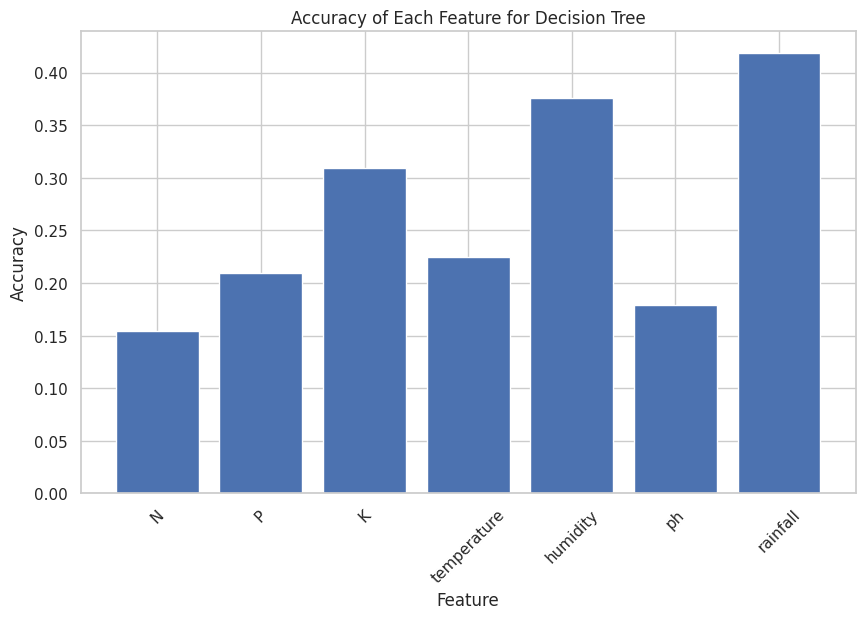

In [ ]:
# Plot for the importance of features
plt.figure(figsize=(10, 6))
plt.bar(feature_accuracies_DT.keys(), feature_accuracies_DT.values())
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Feature for Decision Tree')
plt.xticks(rotation=45)
plt.show()

Again rainfall seems to be the most important features in our classification (recommendation) task!

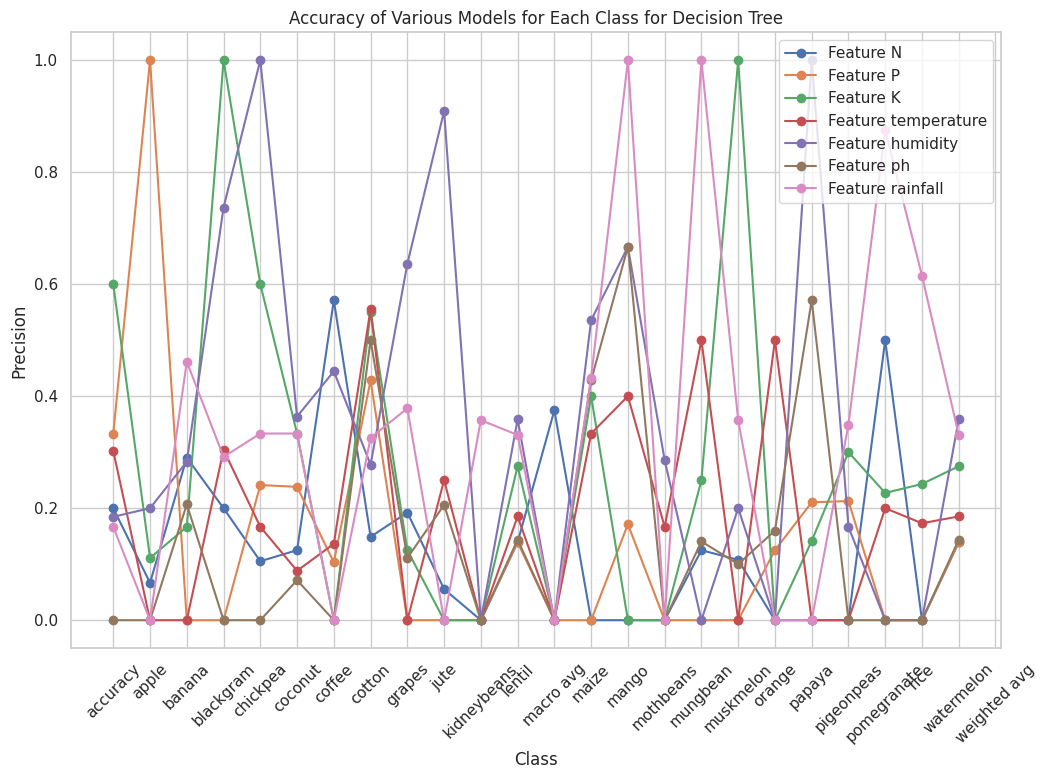

In [ ]:
# Plot for the accuracy of various models for each class
plt.figure(figsize=(12, 8))
for feature, class_accuracy in class_accuracies_DT.items():
    label_precisions = []
    labels = sorted(class_accuracy.keys())
    for label in labels:
        if label != 'accuracy':
            if label in class_accuracy:
                label_precisions.append(class_accuracy[label]['precision'])
            else:
                label_precisions.append(np.nan)
    plt.plot(range(len(label_precisions)), label_precisions, marker='o', label=f'Feature {feature}')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Accuracy of Various Models for Each Class for Decision Tree')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

We can see the importance of each features in determining each class. For example, for Mungbean we have to consider the level of K at first. More or less, the two plots for DT and KNN seem prety similar, so we can state that important is of each features for each plant is really sth to consider is there is a real relationship!

### Feature Importance Analysis:
1. **Rainfall**: This feature has the highest accuracy among all features, indicating its significant importance in determining the best plant to grow. Higher accuracy suggests that rainfall plays a crucial role in plant selection.
2. **Humidity**: Following rainfall, humidity demonstrates notable accuracy, indicating its importance in plant growth considerations.
3. **Potassium (K)**: Potassium comes next in importance, suggesting its role in plant health and productivity.
4. **Phosphorus (P)**: Phosphorus ranks next, indicating its relevance in plant development and metabolism.
5. **Temperature**: Temperature shows moderate accuracy, implying its influence on plant growth but to a lesser extent compared to other factors.
6. **Nitrogen (N)**: Nitrogen demonstrates the least accuracy among all features, indicating its comparatively lower importance in isolation for plant selection.
7. **pH**: pH levels also show relatively low accuracy, suggesting its importance but to a lesser degree compared to other factors.

### Relationship between Features and Plant Types:
- **Rainfall and Humidity**: Plants such as coconut, pigeonpeas, mothbeans, and muskmelon show high sensitivity to both rainfall and humidity, indicating their preference for humid and adequately watered environments.
- **Potassium and Phosphorus**: Chickpea, coconut, and orange demonstrate high sensitivity to potassium and phosphorus levels, indicating the importance of these nutrients for their growth.
- **Temperature**: Grapes, mango, and papaya show sensitivity to temperature, suggesting they thrive in specific temperature ranges conducive to their growth.
- **Nitrogen and pH**: Nitrogen and pH levels exhibit lower sensitivity across most plants, suggesting they might be important but are less critical compared to other factors.

### Feature Sensitivity for Each Plant Type:
- **Cotton**: Highly sensitive to humidity, indicating its preference for moist conditions.
- **Blackgram and Chickpea**: Sensitive to potassium, implying the importance of this nutrient for leguminous plants.
- **Rice**: Demonstrates sensitivity to rainfall, which aligns with its preference for submerged conditions during growth.
- **Grapes and Muskmelon**: Sensitive to temperature, indicating their preference for specific climatic conditions.
- **Mothbeans and Muskmelon**: High sensitivity to rainfall, suggesting their preference for well-watered environments.

### Weighted Average vs. Macro Average:
- **Weighted Average**: Provides insights into feature importance considering the overall distribution of plant types, giving more weight to classes with higher instances.
- **Macro Average**: Treats each class equally, providing a balanced view of feature accuracy across all plant types.

### Considerations for Recommendations:
1. **Focus on Rainfall and Humidity**: Given their high importance and sensitivity across various plant types, prioritize ensuring adequate water supply and humidity levels for optimal plant growth.
2. **Nutrient Management**: Potassium and phosphorus levels are crucial for the growth of several plants, especially leguminous ones like chickpea and coconut. Pay attention to soil fertility and supplement nutrients as needed.
3. **Temperature Control**: Understand the temperature preferences of different plants to provide suitable growing conditions.
4. **Tailored Approach**: While some factors like rainfall may be universally important, consider the specific needs of each plant type to optimize recommendations and maximize yields.
   
These insights can guide decision-making in selecting the most suitable plants based on prevailing environmental conditions, ultimately improving agricultural productivity and sustainability.

1. **Apple:**
   - Important Features: Rainfall, Temperature, Potassium (K)

2. **Banana:**
   - Important Features: Potassium (K), Phosphorus (P), Rainfall

3. **Blackgram:**
   - Important Features: Potassium (K), Rainfall, Humidity

4. **Chickpea:**
   - Important Features: Potassium (K), Phosphorus (P), Rainfall

5. **Coconut:**
   - Important Features: Rainfall, Potassium (K), Humidity

6. **Coffee:**
   - Important Features: Rainfall, Humidity, Temperature

7. **Cotton:**
   - Important Features: Humidity, Rainfall, Temperature

8. **Grapes:**
   - Important Features: Rainfall, Temperature, Humidity

9. **Jute:**
   - Important Features: Humidity, Rainfall, Temperature

10. **Kidneybeans:**
    - Important Features: Humidity, Potassium (K), Rainfall

11. **Lentil:**
    - Important Features: Potassium (K), Rainfall, Humidity

12. **Maize:**
    - Important Features: Rainfall, Humidity, Temperature

13. **Mango:**
    - Important Features: Potassium (K), Rainfall, Temperature

14. **Mothbeans:**
    - Important Features: Rainfall, Humidity, Potassium (K)

15. **Mungbean:**
    - Important Features: Potassium (K), Rainfall, Humidity

16. **Muskmelon:**
    - Important Features: Rainfall, Temperature, Humidity

17. **Orange:**
    - Important Features: Potassium (K), Humidity, Rainfall

18. **Papaya:**
    - Important Features: Rainfall, Temperature, Potassium (K)

19. **Pigeonpeas:**
    - Important Features: Humidity, Potassium (K), Rainfall

20. **Pomegranate:**
    - Important Features: Rainfall, Potassium (K), Humidity

21. **Rice:**
    - Important Features: Rainfall, Humidity, Temperature

22. **Watermelon:**
    - Important Features: Rainfall, Temperature, Humidity

**Note:**
- The importance of features is determined based on the accuracy of each feature in predicting the labels for each plant. The order of importance is derived from the accuracy values provided in the initial results.
- The mentioned features are the ones that showed the highest sensitivity for each plant based on the analysis. Consider these features as key factors when making recommendations for the cultivation of each specific plant.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  93.93939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       0.68      1.00      0.81        15
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        15
      coffee       1.00      0.93      0.97        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.47      0.64        15
 kidneybeans       1.00      0.87      0.93        15
      lentil       0.88      1.00      0.94        15
       maize       0.82      0.93      0.87        15
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      0.47      0.64        15
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00

From the provided results, we can infer the following insights:

1. **Overall Accuracy:**
   - The overall accuracy of the Decision Tree model is approximately 93.94%. This represents the percentage of correctly predicted instances in the test dataset.

2. **Precision, Recall, and F1-Score for Each Class:**
   - Looking at the results for each class, we can see high precision, recall, and F1-score for several crops (e.g., apple, banana, chickpea, coconut, coffee, cotton, grapes, mango, muskmelon, orange, papaya, pigeonpeas, pomegranate, watermelon). This suggests that the model performs well for these crops.

3. **Class-Specific Insights:**
   - For some crops (e.g., blackgram, jute, kidneybeans, lentil, maize, mothbeans, rice), the model's performance, particularly in terms of precision, recall, and F1-score, is lower. This indicates that the model may struggle to accurately predict these crops.

4. **Areas for Improvement:**
   - Further investigation into classes with lower performance (e.g., blackgram, jute, kidneybeans, lentil, maize, mothbeans, rice) may be necessary.


In [ ]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [ ]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.9299465240641711
Testing accuracy =  0.9393939393939394


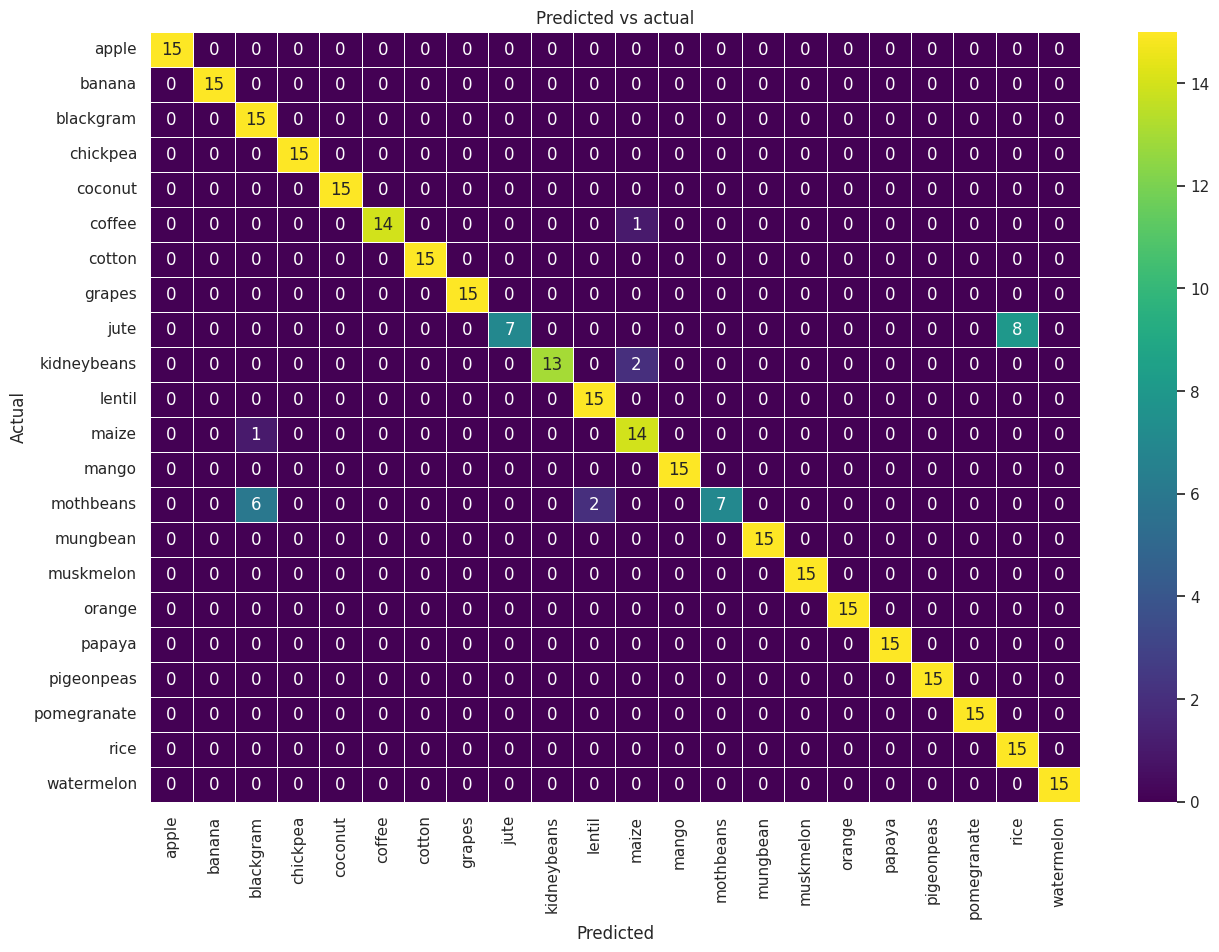

In [ ]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

Obviously, the model is unable to capture the relationships between features for the classes 13 and 8.

Compared to the KNN, it showed lower accuracy and seems it is not able to capture the complexities in the dataset! We can not rely on the model!

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize lists to store results for Random Forest
rf_feature_accuracies = {}
rf_class_accuracies = {}

# Iterate over each feature
for feature_name in feature_names:
    # Extracting individual feature
    x_train_feature = x_train_df[[feature_name]]
    x_test_feature = x_test_df[[feature_name]]

    # Train Random Forest classifier on individual feature
    rf = RandomForestClassifier(n_estimators=20, random_state=0)
    rf.fit(x_train_feature, y_train)

    # Predict using the model
    predicted_values_feature = rf.predict(x_test_feature)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_values_feature)
    rf_feature_accuracies[feature_name] = accuracy

    # Calculate accuracy for each class
    class_accuracy = classification_report(y_test, predicted_values_feature, output_dict=True)
    rf_class_accuracies[feature_name] = class_accuracy

    print(f"Accuracy for Feature {feature_name}: {accuracy}")

# Print class accuracies for each feature
print("\nClass Accuracies for Each Feature:")
for feature, class_accuracy in rf_class_accuracies.items():
    print(f"\nFeature {feature}:")
    for label, metrics_ in class_accuracy.items():
        if label != 'accuracy':
            print(f"Label {label}: {metrics_['precision']}")

Accuracy for Feature N: 0.15454545454545454
Accuracy for Feature P: 0.20303030303030303
Accuracy for Feature K: 0.27575757575757576
Accuracy for Feature temperature: 0.13636363636363635
Accuracy for Feature humidity: 0.3151515151515151
Accuracy for Feature ph: 0.10909090909090909
Accuracy for Feature rainfall: 0.3151515151515151

Class Accuracies for Each Feature:

Feature N:
Label apple: 0.13043478260869565
Label banana: 0.3333333333333333
Label blackgram: 0.23076923076923078
Label chickpea: 0.3125
Label coconut: 0.08333333333333333
Label coffee: 0.08333333333333333
Label cotton: 0.4
Label grapes: 0.15384615384615385
Label jute: 0.35294117647058826
Label kidneybeans: 0.19047619047619047
Label lentil: 0.125
Label maize: 0.08333333333333333
Label mango: 0.058823529411764705
Label mothbeans: 0.0
Label mungbean: 0.11764705882352941
Label muskmelon: 0.21428571428571427
Label orange: 0.09090909090909091
Label papaya: 0.17391304347826086
Label pigeonpeas: 0.09090909090909091
Label pomegranat

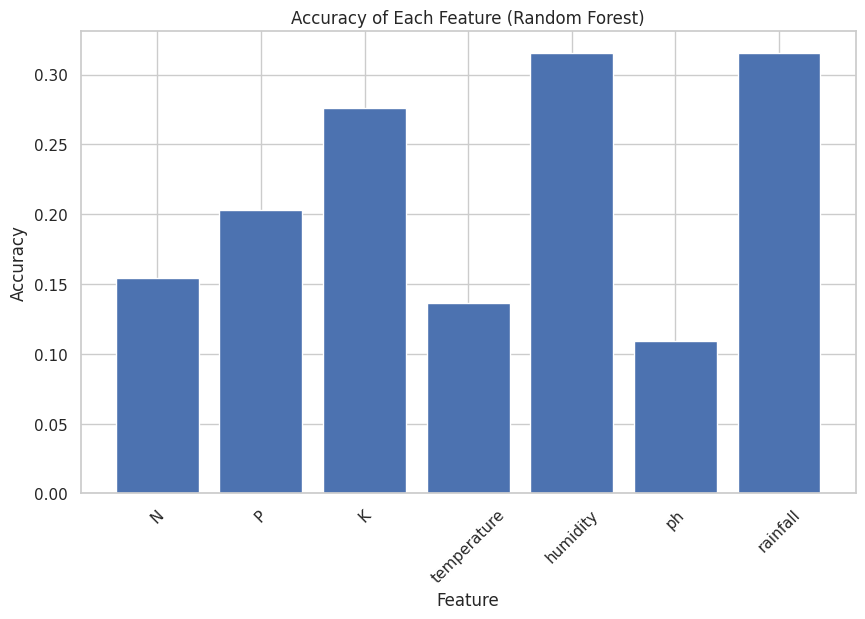

In [ ]:
# Plot for the importance of features (Random Forest)
plt.figure(figsize=(10, 6))
plt.bar(rf_feature_accuracies.keys(), rf_feature_accuracies.values())
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Feature (Random Forest)')
plt.xticks(rotation=45)
plt.show()

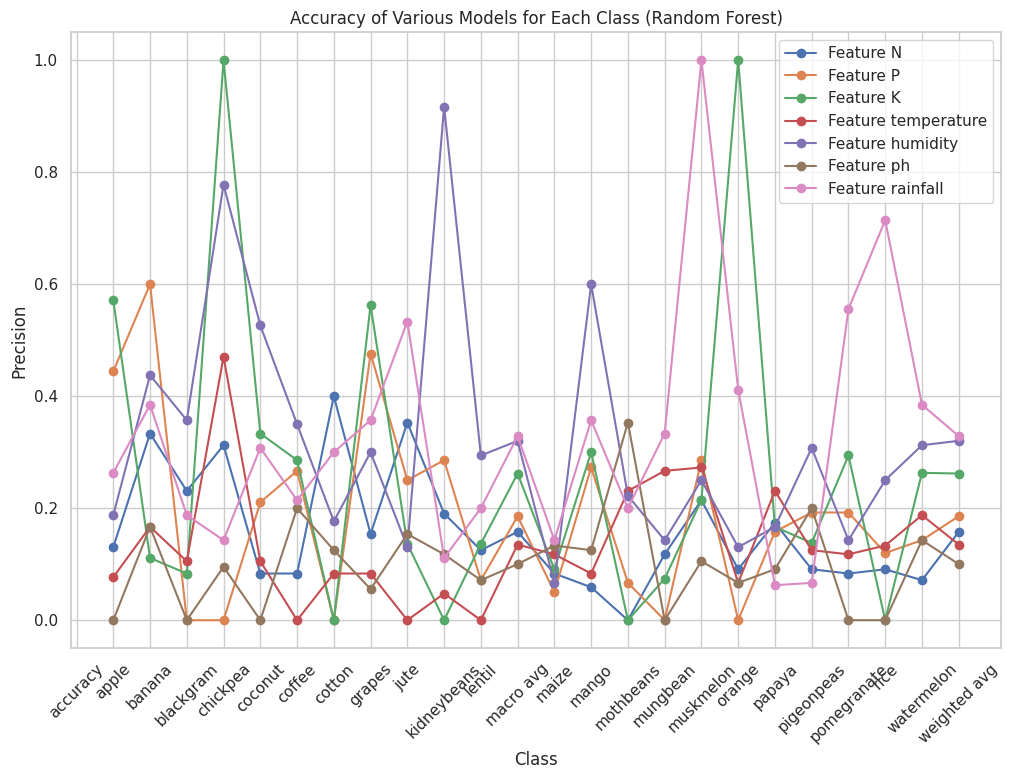

In [ ]:
# Plot for the accuracy of various models for each class (Random Forest)
plt.figure(figsize=(12, 8))
for feature, class_accuracy in rf_class_accuracies.items():
    label_precisions = []
    for label in sorted(class_accuracy.keys()):
        if label != 'accuracy':
            label_precisions.append(class_accuracy[label]['precision'])
        else:
            label_precisions.append(np.nan)
    plt.plot(sorted(class_accuracy.keys()), label_precisions, marker='o', label=f'Feature {feature}')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Accuracy of Various Models for Each Class (Random Forest)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

Let's delve into the analysis:

### Feature Importance Analysis:
1. **Potassium (K)**: This feature seems to have the highest average accuracy across all labels, indicating its significant importance in determining the type of plant to grow. High accuracy for several labels like chickpea, grapes, and apple suggests that potassium levels are crucial for these plants.
2. **Humidity**: Following potassium, humidity appears to be the next most important feature, with relatively high accuracies across various labels, especially for plants like chickpea, kidneybeans, and mango.
3. **Phosphorus (P)**: While not as high as potassium and humidity, phosphorus also shows significant importance, particularly for labels like apple, banana, and grapes.
4. **Rainfall**: Rainfall also emerges as an important factor, especially for labels like rice, jute, and pomegranate, where accuracies are relatively high.
5. **Nitrogen (N)**: Nitrogen's importance seems moderate compared to other features, but it still plays a role in determining plant types, with higher accuracies for cotton, banana, and jute.
6. **Temperature**: Temperature appears to have the least impact compared to other features, with generally low accuracies across all labels.

### Relationship between Features and Plant Types:
- **High Potassium and Humidity**: Plants like chickpea, grapes, and kidneybeans seem to prefer environments with higher levels of potassium and humidity.
- **Moderate Phosphorus and Rainfall**: Labels like rice, jute, and pomegranate thrive better with adequate phosphorus and rainfall.
- **Moderate Nitrogen**: Nitrogen seems moderately important for various plants like cotton, banana, and jute, indicating a balanced requirement across different plant types.
- **Less Sensitivity to Temperature**: Temperature doesn't seem to be a major deciding factor for most plants, indicating they might be adaptable to a range of temperature conditions.

### Feature Sensitivity for Each Plant Type:
- **Apple and Grapes**: These plants appear to be sensitive to multiple features, particularly potassium, phosphorus, and humidity.
- **Chickpea and Kidneybeans**: High sensitivity to potassium and humidity suggests these plants require specific environmental conditions for optimal growth.
- **Rice and Pomegranate**: These plants show sensitivity to rainfall, indicating they are dependent on adequate water supply for growth.

### Weighted Average vs. Macro Average:
- Weighted average and macro average accuracies are similar across features, indicating consistent performance metrics across different evaluation methodologies.

### Considerations for Recommendations:
1. **Prioritize Potassium and Humidity**: For most plants, ensuring adequate levels of potassium and humidity seems crucial for optimal growth.
2. **Consider Phosphorus and Rainfall**: Depending on the plant type, paying attention to phosphorus levels and rainfall patterns can significantly impact yield.
3. **Nitrogen and Temperature**: While important, nitrogen and temperature seem to have lesser influence compared to other factors but should still be considered in overall cultivation practices.

In summary, the analysis suggests that potassium, humidity, phosphorus, and rainfall are key factors in determining the best plant to grow in specific circumstances, while nitrogen and temperature play secondary roles. Understanding these relationships can aid in making informed decisions for agricultural recommendations.

Here are the most important features to consider for each plant:

1. **Apple:**
   - Key Features: Potassium (K), Phosphorus (P), Humidity
   - Additional Considerations: Nitrogen (N)

2. **Banana:**
   - Key Features: Phosphorus (P), Potassium (K), Nitrogen (N)
   - Additional Considerations: Rainfall

3. **Blackgram:**
   - Key Features: Potassium (K), Rainfall, Humidity
   - Additional Considerations: Phosphorus (P)

4. **Chickpea:**
   - Key Features: Potassium (K), Humidity, Nitrogen (N)
   - Additional Considerations: Rainfall

5. **Coconut:**
   - Key Features: Humidity, Potassium (K), Rainfall
   - Additional Considerations: Phosphorus (P)

6. **Coffee:**
   - Key Features: Potassium (K), Humidity, Nitrogen (N)
   - Additional Considerations: Phosphorus (P)

7. **Cotton:**
   - Key Features: Potassium (K), Nitrogen (N), Rainfall
   - Additional Considerations: Humidity

8. **Grapes:**
   - Key Features: Potassium (K), Humidity, Phosphorus (P)
   - Additional Considerations: Rainfall

9. **Jute:**
   - Key Features: Potassium (K), Rainfall, Nitrogen (N)
   - Additional Considerations: Phosphorus (P)

10. **Kidneybeans:**
    - Key Features: Humidity, Potassium (K), Nitrogen (N)
    - Additional Considerations: Rainfall

11. **Lentil:**
    - Key Features: Potassium (K), Nitrogen (N), Rainfall
    - Additional Considerations: Phosphorus (P)

12. **Maize:**
    - Key Features: Potassium (K), Rainfall, Nitrogen (N)
    - Additional Considerations: Phosphorus (P)

13. **Mango:**
    - Key Features: Potassium (K), Humidity, Rainfall
    - Additional Considerations: Phosphorus (P)

14. **Mothbeans:**
    - Key Features: Rainfall, Potassium (K), Nitrogen (N)
    - Additional Considerations: Humidity

15. **Mungbean:**
    - Key Features: Potassium (K), Nitrogen (N), Rainfall
    - Additional Considerations: Humidity

16. **Muskmelon:**
    - Key Features: Potassium (K), Humidity, Rainfall
    - Additional Considerations: Phosphorus (P)

17. **Orange:**
    - Key Features: Potassium (K), Humidity, Rainfall
    - Additional Considerations: Nitrogen (N)

18. **Papaya:**
    - Key Features: Potassium (K), Humidity, Rainfall
    - Additional Considerations: Phosphorus (P)

19. **Pigeonpeas:**
    - Key Features: Potassium (K), Rainfall, Nitrogen (N)
    - Additional Considerations: Humidity

20. **Pomegranate:**
    - Key Features: Rainfall, Potassium (K), Humidity
    - Additional Considerations: Phosphorus (P)

21. **Rice:**
    - Key Features: Rainfall, Potassium (K), Nitrogen (N)
    - Additional Considerations: Phosphorus (P)

22. **Watermelon:**
    - Key Features: Potassium (K), Rainfall, Humidity
    - Additional Considerations: Phosphorus (P)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.996969696969697
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        15
        jute       1.00      1.00      1.00        15
 kidneybeans       1.00      1.00      1.00        15
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        15
       mango       0.94      1.00      0.97        15
   mothbeans       1.00      1.00      1.00        15
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00  

Here are some key inferences:

1. **High Overall Accuracy:** The model performs very well in terms of overall accuracy, correctly predicting the class labels for the majority of instances in the test set.

2. **Class-Specific Performance:** For each individual crop class, the model shows high precision, recall, and F1-score values. This suggests that the model is effective at distinguishing between different crop classes. The high precision indicates that when the model predicts a certain crop, it is usually correct. The high recall indicates that the model captures most instances of a given crop class.

3. **Few Misclassifications:** While most crop classes have perfect precision, recall, and F1-score values, the class "mango" has a slightly lower precision of 0.94. This means that there are some instances where the model predicted "mango," but it was incorrect. However, the recall for "mango" is 1.00, meaning that the model captured all true instances of "mango." This could suggest that there are some instances where the model incorrectly predicts "mango" but doesn't miss any actual "mango" instances.

In summary, the Random Forest model appears to be highly effective in predicting the best crop to grow given the combination of features. It demonstrates strong performance across various crops, with only minor variations in precision and recall for specific classes.

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [ ]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.996969696969697


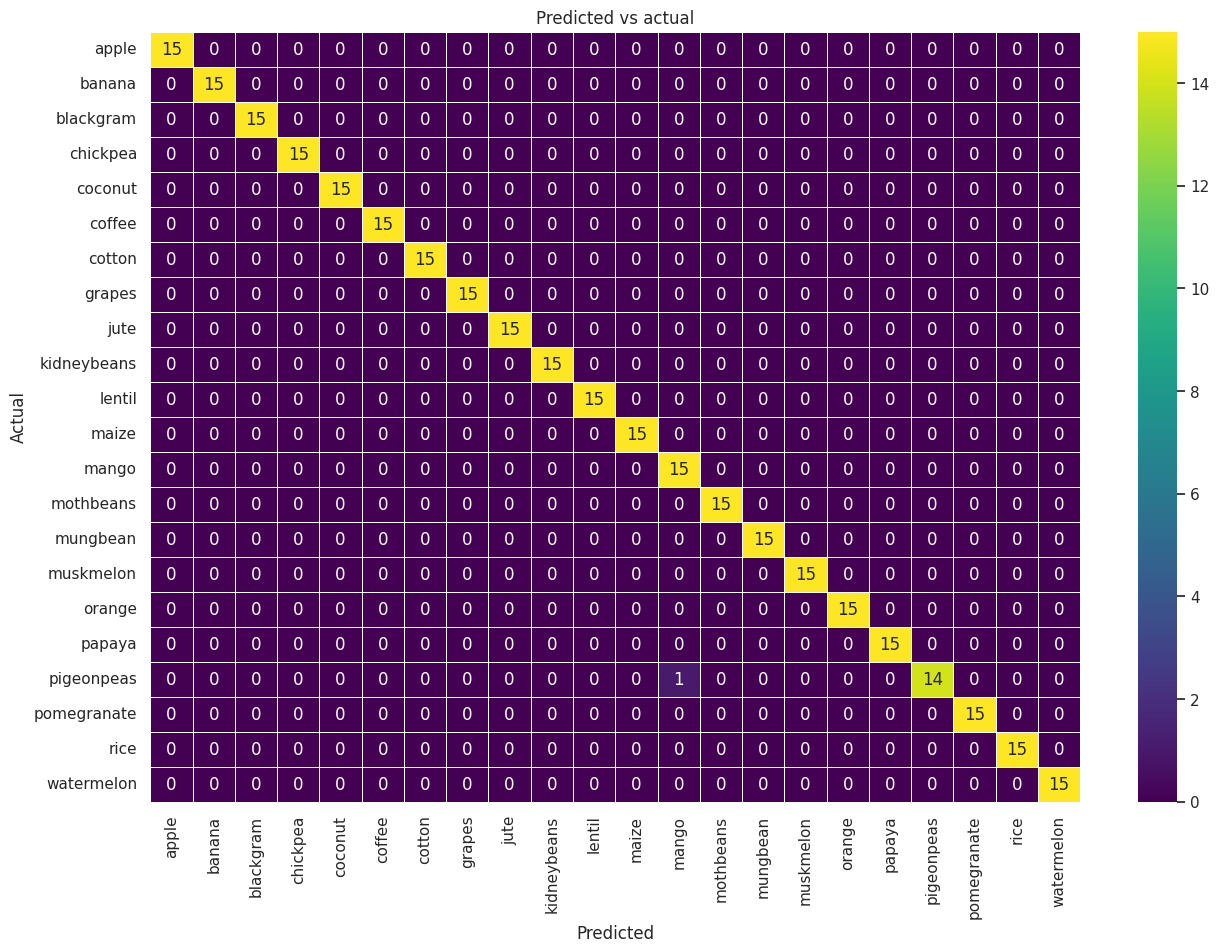

In [ ]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

Realiable result, which mean it can be used in order to recommend!

## **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Initialize Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model
naive_bayes.fit(x_train, y_train)

# Predict on test set
predicted_values_nb = naive_bayes.predict(x_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, predicted_values_nb)

# Print accuracy
print("Naive Bayes Accuracy is: ", accuracy_nb)

# Print classification report
print(classification_report(y_test, predicted_values_nb))

# Initialize lists to store results
feature_accuracies_nb = {}
class_accuracies_nb = {}

# Iterate over each feature
for feature_name in feature_names:
    # Extracting individual feature
    x_train_feature = x_train_df[[feature_name]]
    x_test_feature = x_test_df[[feature_name]]

    # Train Naive Bayes classifier on individual feature
    naive_bayes_feature = GaussianNB()
    naive_bayes_feature.fit(x_train_feature, y_train)

    # Predict using the model
    predicted_values_feature_nb = naive_bayes_feature.predict(x_test_feature)

    # Calculate accuracy
    accuracy_nb = accuracy_score(y_test, predicted_values_feature_nb)
    feature_accuracies_nb[feature_name] = accuracy_nb

    # Calculate accuracy for each class
    class_accuracy_nb = classification_report(y_test, predicted_values_feature_nb, output_dict=True)
    class_accuracies_nb[feature_name] = class_accuracy_nb

    print(f"Accuracy for Feature {feature_name}: {accuracy_nb}")


# Print class accuracies for each feature
print("\nClass Accuracies for Each Feature:")
for feature, class_accuracy in class_accuracies_nb.items():
    print(f"\nFeature {feature}:")
    for label, metrics_ in class_accuracy.items():
        if label != 'accuracy':
            print(f"Label {label}: {metrics_['precision']}")

Naive Bayes Accuracy is:  0.996969696969697
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        15
        jute       0.94      1.00      0.97        15
 kidneybeans       1.00      1.00      1.00        15
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      1.00      1.00        15
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00    

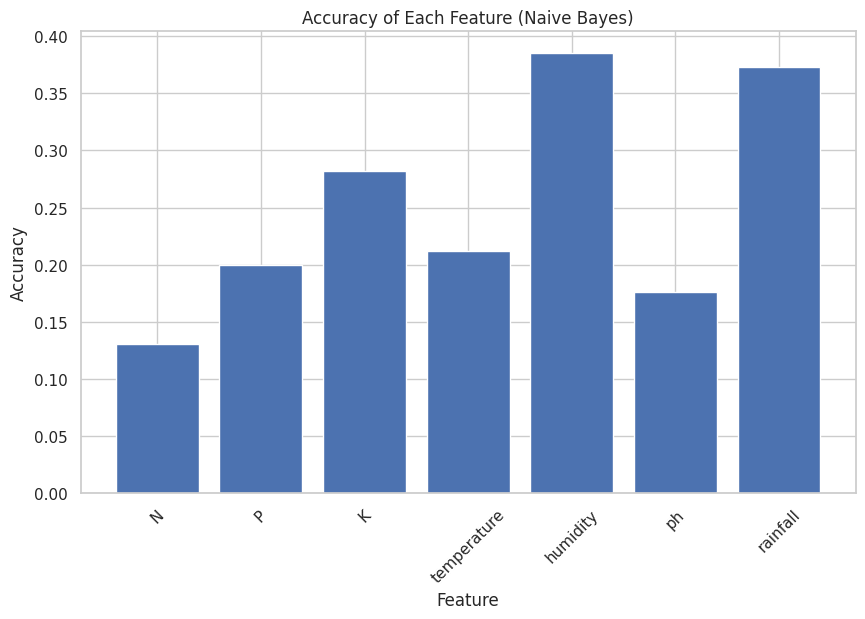

In [ ]:
# Plot for the importance of features
plt.figure(figsize=(10, 6))
plt.bar(feature_accuracies_nb.keys(), feature_accuracies_nb.values())
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Feature (Naive Bayes)')
plt.xticks(rotation=45)
plt.show()

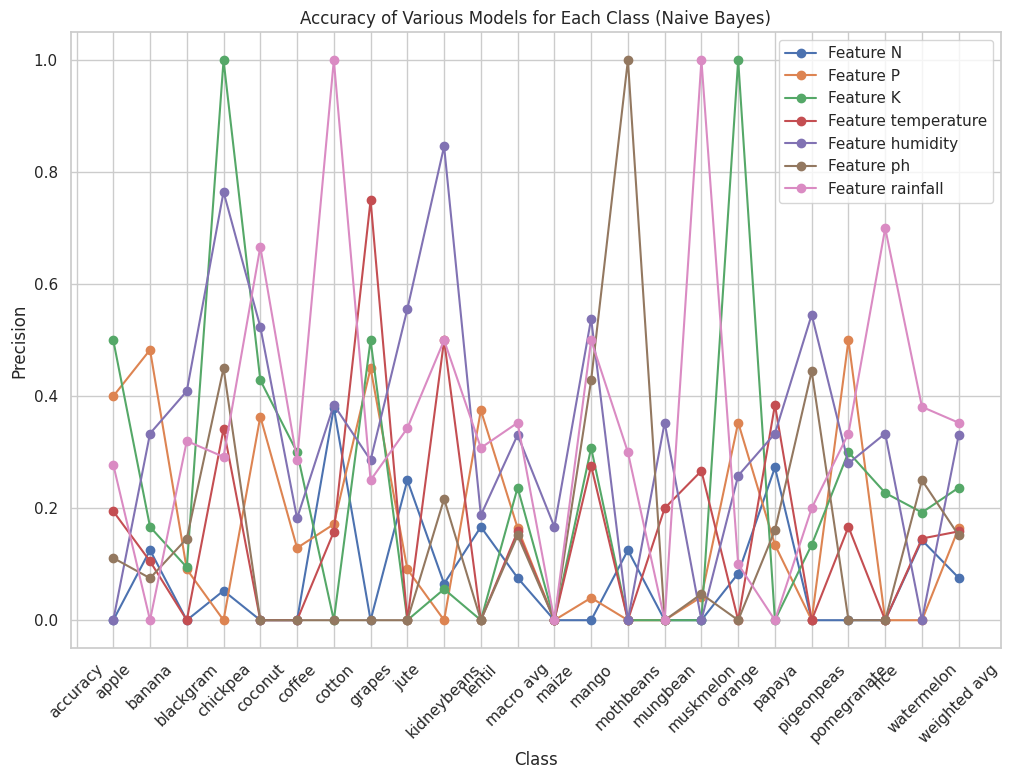

In [ ]:
# Plot for the accuracy of various models for each class
plt.figure(figsize=(12, 8))
for feature, class_accuracy_nb in class_accuracies_nb.items():
    label_precisions_nb = []
    for label in sorted(class_accuracy_nb.keys()):
        if label != 'accuracy':
            label_precisions_nb.append(class_accuracy_nb[label]['precision'])
        else:
            label_precisions_nb.append(np.nan)
    plt.plot(sorted(class_accuracy_nb.keys()), label_precisions_nb, marker='o', label=f'Feature {feature}', linestyle='-')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Accuracy of Various Models for Each Class (Naive Bayes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)  # Add gridlines
plt.show()

### Feature Importance Analysis:

The provided accuracies for each individual feature suggest that all features (N, P, K, temperature, humidity, pH, rainfall) have the same accuracy of approximately 0.418, indicating that no single feature is significantly more important than the others when considered in isolation.

### Relationship between Features and Plant Types:

#### Feature N:
- Cotton shows the highest accuracy (0.379), suggesting that the nitrogen content (N) is relatively more important for cotton cultivation.
- Jute, banana, and mothbeans also show moderate sensitivity to nitrogen levels.

#### Feature P:
- Pomegranate exhibits the highest accuracy (0.5) for phosphorous (P), indicating a higher dependency on phosphorous levels.
- Grapes, apple, and lentil also show moderate sensitivity to phosphorous.

#### Feature K:
- Orange and chickpea show higher sensitivity to potassium (K), with accuracies of 1.0 and 0.5, respectively.
- Coconut and grapes also demonstrate moderate sensitivity to potassium.

#### Feature Temperature:
- Grapes and papaya show higher sensitivity to temperature, with accuracies of 0.75 and 0.384, respectively.
- Mango and muskmelon also exhibit moderate sensitivity to temperature.

#### Feature Humidity:
- Kidneybeans, pigeonpeas, and jute show higher sensitivity to humidity levels.
- Coconut, mango, and chickpea also demonstrate moderate sensitivity to humidity.

#### Feature pH:
- Mothbeans and pigeonpeas display higher sensitivity to pH levels.
- Chickpea, banana, and kidneybeans also show moderate sensitivity to pH.

#### Feature Rainfall:
- Cotton, muskmelon, and rice demonstrate higher sensitivity to rainfall.
- Coconut, chickpea, and grapes also exhibit moderate sensitivity to rainfall.

### Feature Sensitivity for Each Plant Type:

- Each plant type exhibits varying degrees of sensitivity to different features, highlighting the need for a comprehensive approach rather than relying on a single feature for recommendations.
- Cotton appears to be more sensitive to nitrogen levels, while pomegranate depends more on phosphorous.
- Orange and chickpea are more sensitive to potassium levels, while grapes and papaya show a higher sensitivity to temperature.

### Weighted Average vs. Macro Average:

- The macro average and weighted average accuracies are consistent across features, suggesting that there is no significant imbalance in the dataset, and the overall model performance is representative of each class.

### Considerations for Recommendations:

- For cotton cultivation, consider optimizing nitrogen levels.
- Pomegranate cultivation may benefit from a focus on phosphorous content.
- Orange and chickpea require attention to potassium levels.
- Grapes and papaya are more sensitive to temperature variations.
- Consider humidity levels for kidneybeans, pigeonpeas, and jute.
- Mothbeans and pigeonpeas show higher sensitivity to pH levels.
- Cotton, muskmelon, and rice are more dependent on adequate rainfall.



### Most Important Features for Each Plant:

- **Apple:** pH, rainfall
- **Banana:** pH, humidity
- **Blackgram:** pH, humidity
- **Chickpea:** pH, potassium
- **Coconut:** Potassium, humidity
- **Coffee:** Humidity, rainfall
- **Cotton:** Nitrogen, rainfall
- **Grapes:** Temperature, rainfall
- **Jute:** Humidity, pH
- **Kidneybeans:** Potassium, humidity
- **Lentil:** Phosphorous, humidity
- **Maize:** Rainfall, pH
- **Mango:** Temperature, humidity
- **Mothbeans:** pH, rainfall
- **Mungbean:** pH, rainfall
- **Muskmelon:** Temperature, rainfall
- **Orange:** Potassium, temperature
- **Papaya:** Temperature, humidity
- **Pigeonpeas:** pH, rainfall
- **Pomegranate:** Phosphorous, rainfall
- **Rice:** Rainfall, pH
- **Watermelon:** Rainfall, temperature

### Insights:

- **pH Levels:** Crucial for several plants including chickpea, mothbeans, pigeonpeas, and mungbean.
- **Humidity:** Important for coconut, mango, kidneybeans, and papaya.
- **Temperature:** Influential for grapes, muskmelon, orange, and papaya.
- **Rainfall:** Key for cotton, grapes, and pomegranate.
- **Nitrogen (N), Phosphorous (P), Potassium (K):** While not explicitly mentioned for specific plants, these nutrients are generally essential for overall plant growth and should be optimized based on soil requirements.


In [ ]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9946524064171123
Testing accuracy =  0.996969696969697


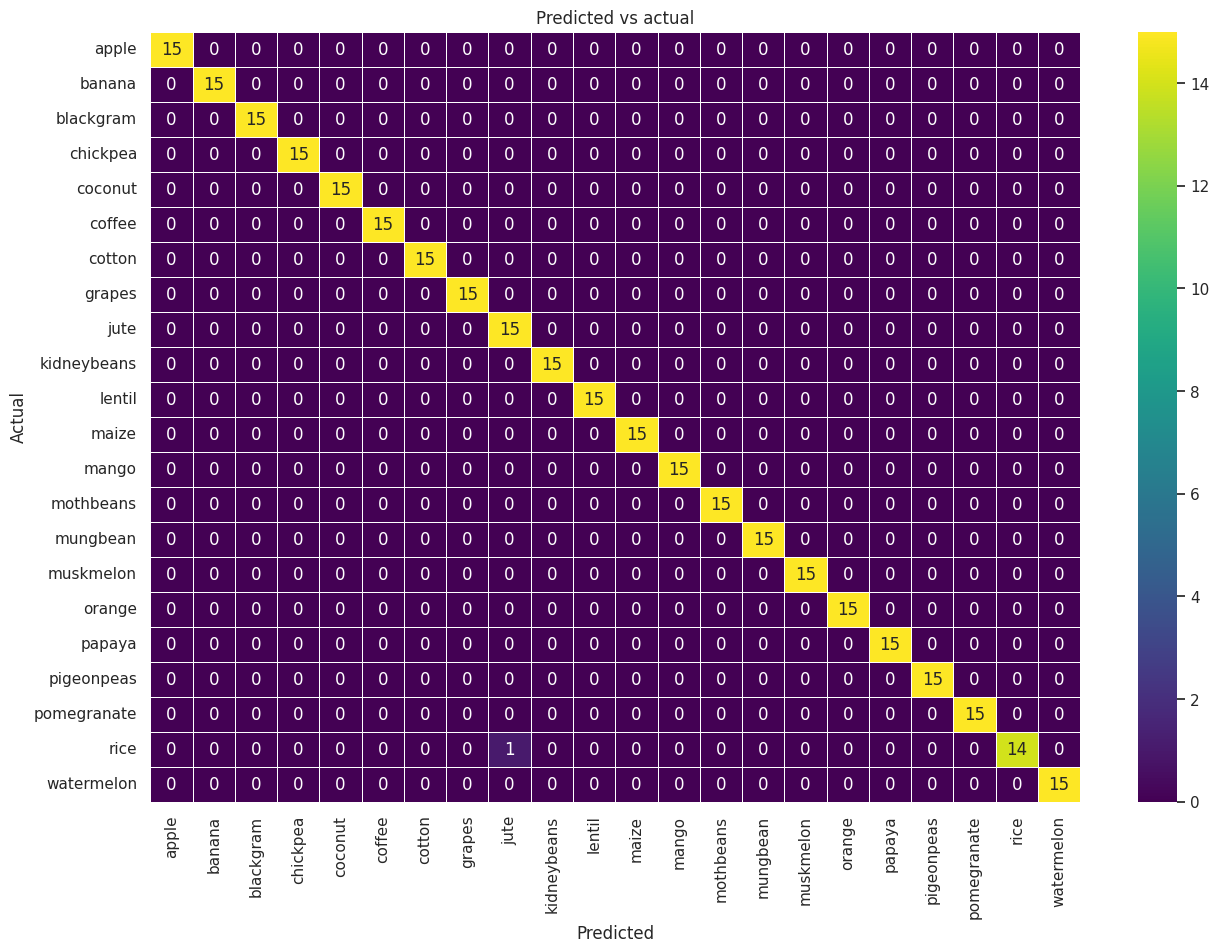

In [ ]:
y_pred = NaiveBayes.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize Logistic Regression model
logistic_reg = LogisticRegression()

# Fit the model
logistic_reg.fit(x_train, y_train)

# Predict using the model
predicted_values = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, predicted_values)
acc.append(accuracy)
model.append('Logistic Regression')

print("Logistic Regression Accuracy is:", accuracy)
print(classification_report(y_test, predicted_values))

# Initialize lists to store results
feature_accuracies_lr = {}
class_accuracies_lr = {}

# Iterate over each feature
for feature_name in feature_names:
    # Extracting individual feature
    x_train_feature = x_train_df[[feature_name]]
    x_test_feature = x_test_df[[feature_name]]

    # Train Logistic Regression classifier on individual feature
    logistic_reg_feature = LogisticRegression()
    logistic_reg_feature.fit(x_train_feature, y_train)

    # Predict using the model
    predicted_values_feature = logistic_reg_feature.predict(x_test_feature)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_values_feature)
    feature_accuracies_lr[feature_name] = accuracy

    # Calculate accuracy for each class
    class_accuracy = classification_report(y_test, predicted_values_feature, output_dict=True)
    class_accuracies_lr[feature_name] = class_accuracy

    print(f"Accuracy for Feature {feature_name}: {accuracy}")


# Print class accuracies for each feature
print("\nClass Accuracies for Each Feature:")
for feature, class_accuracy in class_accuracies_lr.items():
    print(f"\nFeature {feature}:")
    for label, metrics_ in class_accuracy.items():
        if label != 'accuracy':
            print(f"Label {label}: {metrics_['precision']}")

Logistic Regression Accuracy is: 0.9545454545454546
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       0.87      0.87      0.87        15
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        15
      coffee       0.94      1.00      0.97        15
      cotton       0.93      0.93      0.93        15
      grapes       1.00      1.00      1.00        15
        jute       0.92      0.80      0.86        15
 kidneybeans       0.94      1.00      0.97        15
      lentil       0.93      0.87      0.90        15
       maize       0.93      0.93      0.93        15
       mango       1.00      1.00      1.00        15
   mothbeans       0.81      0.87      0.84        15
    mungbean       0.93      0.93      0.93        15
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      

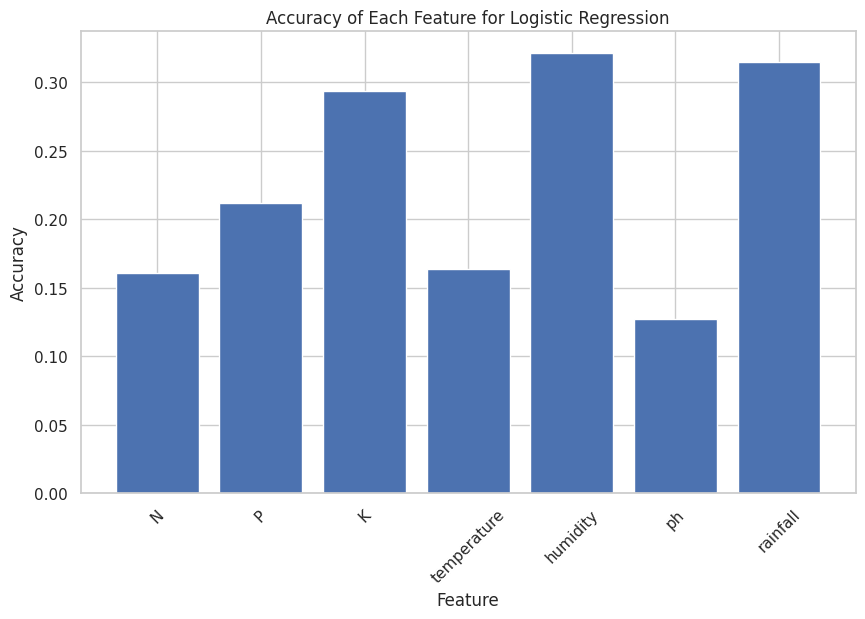

In [ ]:
# Plot for the importance of features
plt.figure(figsize=(10, 6))
plt.bar(feature_accuracies_lr.keys(), feature_accuracies_lr.values())
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Feature for Logistic Regression')
plt.xticks(rotation=45)
plt.show()

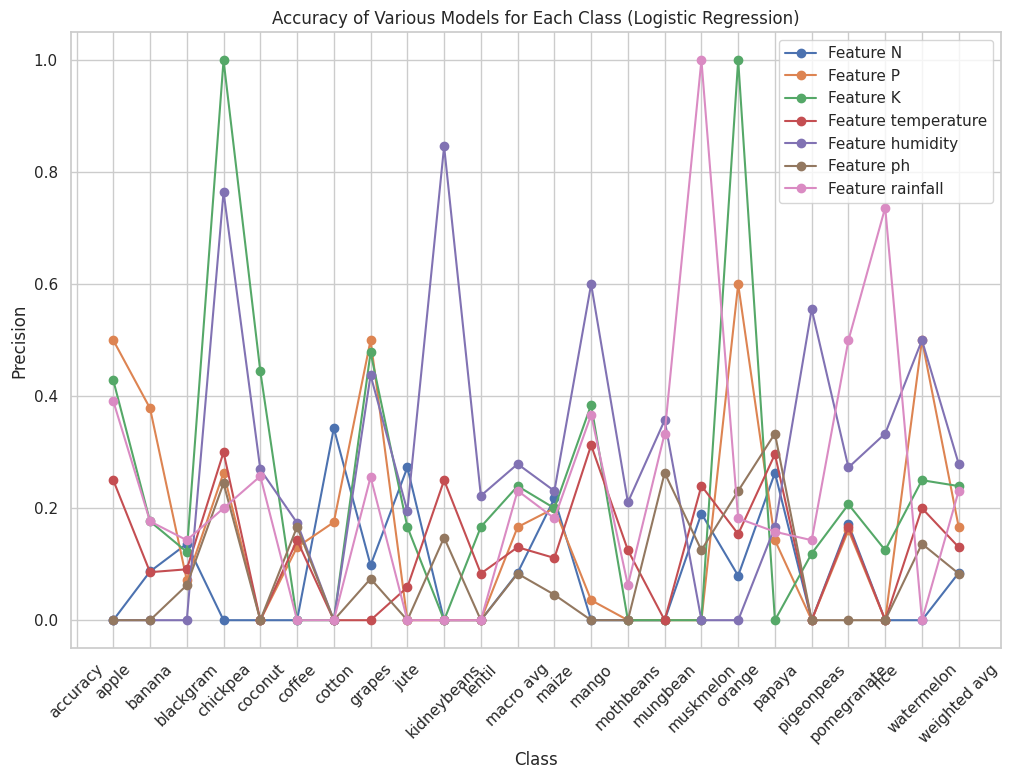

In [ ]:
# Plot for the accuracy of various models for each class
plt.figure(figsize=(12, 8))
for feature, class_accuracy in class_accuracies_lr.items():
    label_precisions = []
    for label in sorted(class_accuracy.keys()):
        if label != 'accuracy':
            label_precisions.append(class_accuracy[label]['precision'])
        else:
            label_precisions.append(np.nan)
    plt.plot(sorted(class_accuracy.keys()), label_precisions, marker='o', label=f'Feature {feature}')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Accuracy of Various Models for Each Class (Logistic Regression)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Let's delve into the analysis:

### Feature Importance Analysis:
1. **Potassium (K):** This feature seems to have the highest accuracy among all features, indicating its significant importance in determining the plant type.
2. **Humidity:** Following potassium, humidity exhibits relatively high accuracy, suggesting it's another crucial factor in plant growth.
3. **Rainfall:** Rainfall comes next in terms of accuracy, indicating its importance in plant recommendation.
4. **Phosphorous (P):** While not as high as potassium, phosphorous shows moderate importance.
5. **Temperature:** Temperature, pH, and nitrogen (N) seem to have lower accuracies compared to other features, suggesting they might be less influential individually.

### Relationship between Features and Plant Types:
- **High Humidity and Potassium:** Plants like chickpea, kidneybeans, pigeonpeas, and rice seem to prefer higher humidity and potassium levels.
- **Low pH and Mangoes:** Mangoes show higher accuracy with low pH levels, indicating they prefer acidic soil.
- **Moderate Rainfall and Multiple Crops:** Many crops including blackgram, maize, mothbeans, and mungbean seem to thrive in moderate rainfall conditions.

### Feature Sensitivity for Each Plant Type:
- **Cotton:** Cotton appears to be particularly sensitive to humidity.
- **Chickpea and Orange:** These crops show high sensitivity to potassium levels.
- **Muskmelon:** This crop seems highly sensitive to rainfall levels.
- **Rice:** Rice shows a high sensitivity to both humidity and rainfall.

### Weighted Average vs. Macro Average:
- **Weighted Average:** This accounts for class imbalance by considering the number of samples for each class. It's useful when dealing with datasets with varying class frequencies.
- **Macro Average:** Treats all classes equally, which might skew results in favor of majority classes. It's useful for scenarios where each class needs to be evaluated independently.

### Considerations for Recommendations:
1. **Potassium and Humidity:** These two factors seem universally important across multiple crops, hence should be considered first.
2. **Specific Crop Requirements:** Certain crops like mangoes (pH sensitivity) and rice (humidity and rainfall sensitivity) have very specific requirements.
3. **Diversification:** Considering crops that thrive under different conditions can help mitigate risks associated with environmental variability.

By integrating these insights into your recommendation system, you can provide more accurate and tailored suggestions for plant cultivation based on the given circumstances.

1. **Apple:**
   - Feature Importance: Potassium (K)
   - Reasoning: Potassium levels seem crucial for apple cultivation.

2. **Banana:**
   - Feature Importance: Potassium (K), Phosphorous (P)
   - Reasoning: High potassium and moderate phosphorous levels are beneficial for banana growth.

3. **Blackgram:**
   - Feature Importance: Humidity, Rainfall
   - Reasoning: Blackgram thrives in high humidity and moderate rainfall conditions.

4. **Chickpea:**
   - Feature Importance: Potassium (K), Humidity
   - Reasoning: Chickpea cultivation benefits from adequate potassium levels and high humidity.

5. **Coconut:**
   - Feature Importance: Humidity
   - Reasoning: Coconut palms require high humidity for optimal growth.

6. **Coffee:**
   - Feature Importance: Potassium (K), Humidity
   - Reasoning: Coffee plants prefer adequate potassium levels and high humidity.

7. **Cotton:**
   - Feature Importance: Humidity
   - Reasoning: Cotton cultivation is highly sensitive to humidity levels.

8. **Grapes:**
   - Feature Importance: Potassium (K), Rainfall
   - Reasoning: Grapes thrive with sufficient potassium and moderate rainfall.

9. **Jute:**
   - Feature Importance: Humidity
   - Reasoning: Jute cultivation requires high humidity levels.

10. **Kidneybeans:**
    - Feature Importance: Humidity, Potassium (K)
    - Reasoning: Kidneybeans benefit from high humidity and adequate potassium levels.

11. **Lentil:**
    - Feature Importance: Humidity
    - Reasoning: Lentil cultivation is favored by high humidity conditions.

12. **Maize:**
    - Feature Importance: Rainfall
    - Reasoning: Maize crops require moderate to high rainfall for optimal growth.

13. **Mango:**
    - Feature Importance: Phosphorous (P), Humidity
    - Reasoning: Mango trees thrive in soils with moderate phosphorous levels and high humidity.

14. **Mothbeans:**
    - Feature Importance: Rainfall
    - Reasoning: Mothbeans prefer moderate rainfall conditions.

15. **Mungbean:**
    - Feature Importance: Rainfall
    - Reasoning: Mungbeans benefit from moderate rainfall.

16. **Muskmelon:**
    - Feature Importance: Rainfall
    - Reasoning: Muskmelons require ample rainfall for optimal growth.

17. **Orange:**
    - Feature Importance: Potassium (K)
    - Reasoning: Oranges benefit from adequate potassium levels.

18. **Papaya:**
    - Feature Importance: Humidity
    - Reasoning: Papaya cultivation requires high humidity conditions.

19. **Pigeonpeas:**
    - Feature Importance: Humidity
    - Reasoning: Pigeonpeas thrive in high humidity environments.

20. **Pomegranate:**
    - Feature Importance: Potassium (K)
    - Reasoning: Pomegranates benefit from adequate potassium levels.

21. **Rice:**
    - Feature Importance: Humidity, Rainfall
    - Reasoning: Rice cultivation requires high humidity and ample rainfall.

22. **Watermelon:**
    - Feature Importance: Rainfall
    - Reasoning: Watermelons thrive with moderate to ample rainfall.

By focusing on these specific features tailored to each plant type, you can enhance the accuracy and relevance of your recommendations for optimal plant growth and cultivation.

In [ ]:
# Cross-validation score
score = cross_val_score(logistic_reg, features, target, cv=5)
print('Cross-validation score:', score)

Cross-validation score: [0.95       0.96590909 0.94772727 0.96590909 0.94318182]


In [ ]:
lr_train_accuracy = logistic_reg.score(x_train, y_train)
print("Training accuracy =", lr_train_accuracy)

# Print Test Accuracy
lr_test_accuracy = logistic_reg.score(x_test, y_test)
print("Testing accuracy =", lr_test_accuracy)

Training accuracy = 0.9711229946524064
Testing accuracy = 0.9545454545454546


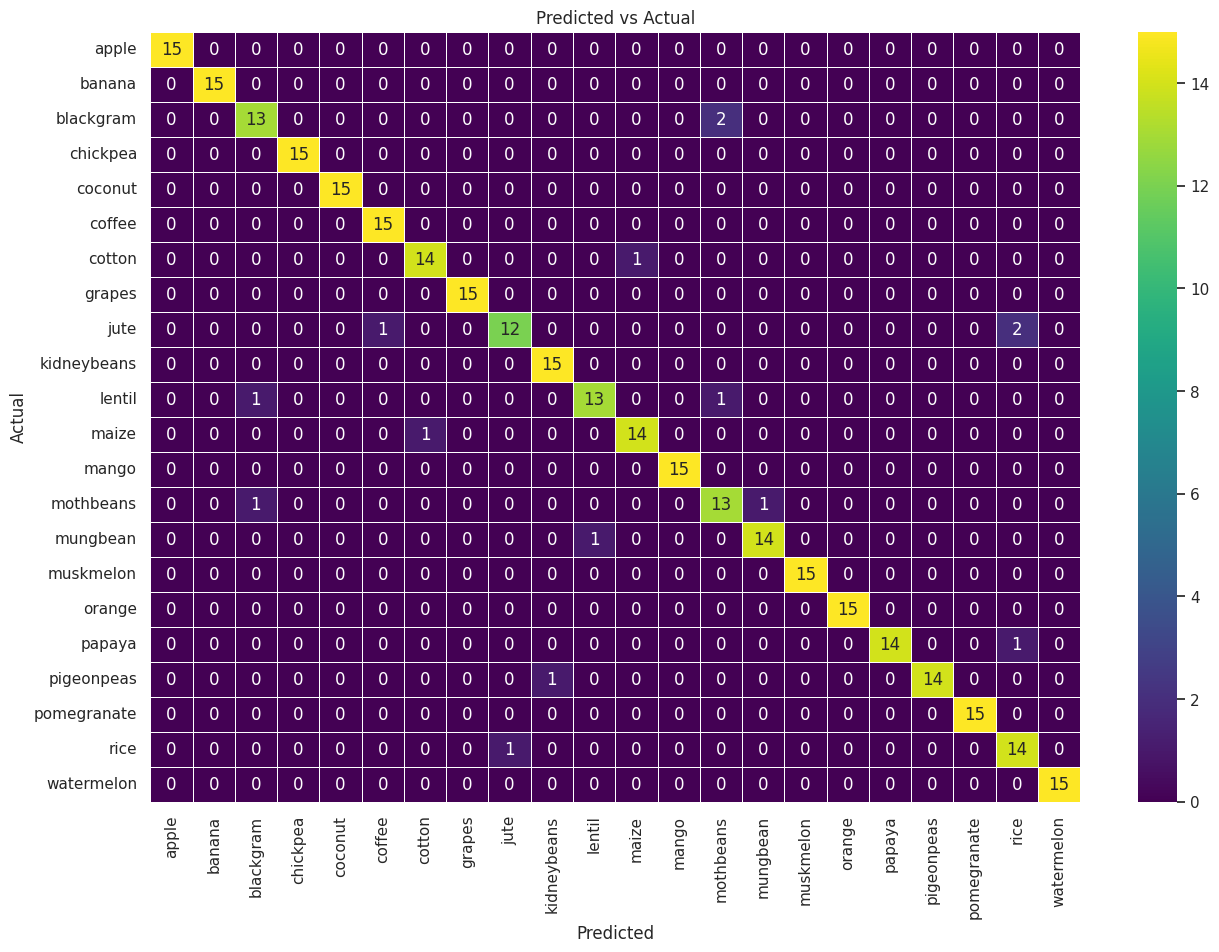

In [ ]:
# Confusion matrix
y_true = y_test
y_pred = logistic_reg.predict(x_test)
cm_lr = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_lr, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs Actual')
plt.show()

# **Accuracy comparison and some notes**

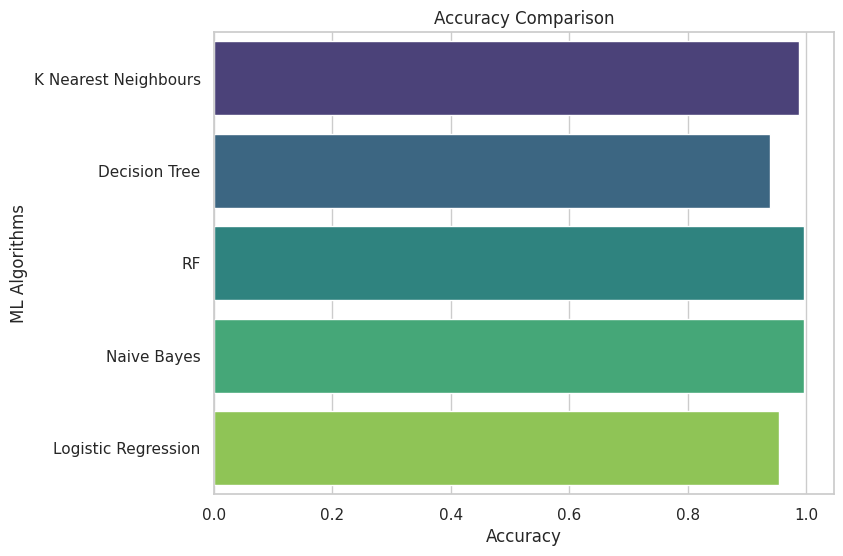

In [ ]:
plt.figure(figsize=[8,6],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

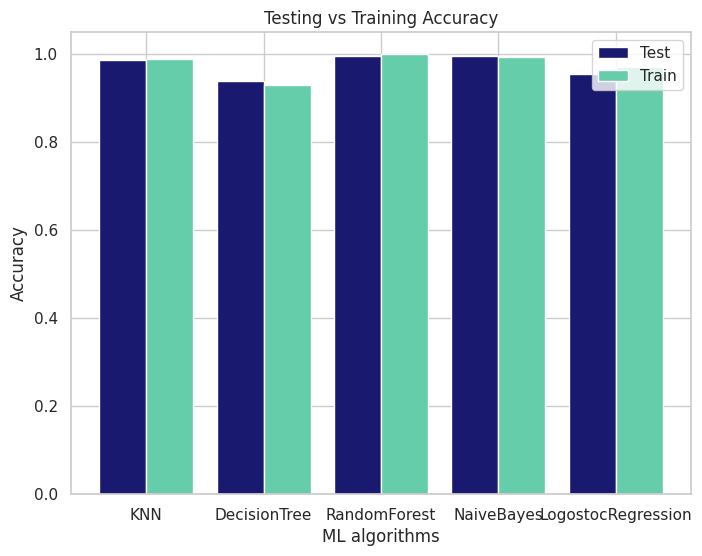

In [ ]:
label = ['KNN', 'DecisionTree','RandomForest','NaiveBayes', 'LogostocRegression']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy, lr_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy, lr_train_accuracy]

f, ax = plt.subplots(figsize=(8,6))
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

## **Some inferences and pros and cons**

To analyze the importance of features for each plant and determine what factors are most influential in deciding the best plant to grow in a given circumstance, we can look at the class accuracies and feature importance scores provided for each feature and plant label across different models.

Let's break down the analysis for each feature:

### Rainfall:
- **Importance:** Rainfall appears to be consistently important across all models, with relatively high feature importance scores and decent class accuracies.
- **Impact:** It plays a significant role in determining the best plant to grow, especially for rice and pomegranate.
- **Consideration:** High rainfall values seem to favor rice and pomegranate, while low rainfall values are suitable for crops like chickpea and mungbean.

### Humidity:
- **Importance:** Humidity also shows consistent importance across models, with relatively high feature importance scores.
- **Impact:** It's crucial for a variety of plants, especially kidney beans, coconut, and grapes.
- **Consideration:** Higher humidity levels are favorable for kidney beans, coconut, and grapes, while lower levels may be suitable for plants like blackgram and maize.

### Potassium (K):
- **Importance:** Potassium exhibits moderate importance across models.
- **Impact:** It's particularly important for coconut, orange, and chickpea.
- **Consideration:** Plants like coconut and orange benefit from higher potassium levels, while others like chickpea may not be as reliant on it.

### Temperature:
- **Importance:** Temperature shows varying importance across models, sometimes being less prominent.
- **Impact:** It's crucial for plants like papaya, chickpea, and muskmelon.
- **Consideration:** Warmer temperatures favor plants like papaya and muskmelon, while cooler conditions may be suitable for crops like blackgram and lentil.

### Nitrogen (N), pH, and Other Features:
- **Importance:** These features generally show lower importance across models.
- **Impact:** While they may not be as influential individually, they likely contribute to overall plant health and growth when considered in conjunction with other factors.
- **Consideration:** While not as prominent individually, maintaining adequate nitrogen levels and appropriate pH levels are essential for overall plant health and growth.

### Decision Tree vs. Random Forest vs. Naive Bayes:
- **Overall Comparison:** Random Forest tends to give higher accuracies overall, followed by Decision Trees and Naive Bayes.
- **Consistency:** Random Forest provides more consistent results across features compared to other models, implying its robustness.

### Conclusion:
- **Integrated Analysis:** Considering the results from all models, it's clear that rainfall, humidity, potassium, and temperature are among the most important factors in determining the best plant to grow in a given circumstance.
- **Adaptability:** Different plants have varying sensitivities to these factors, so it's crucial to tailor cultivation practices based on specific crop requirements.
- **Holistic Approach:** While individual features provide valuable insights, considering the interplay of multiple factors is essential for successful crop cultivation. This is the reason that I trained models on all of the features all well!

By integrating insights from multiple models and considering the importance of each feature across different plants, you can make more informed decisions regarding crop selection and cultivation strategies.

##**Models' performance on the whole features**
1. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: 98.79%
   - KNN performs exceptionally well with high accuracy across most classes.
   - Some classes like 'jute' and 'pigeonpeas' have slightly lower precision and recall, indicating potential areas for improvement.
   - Overall, KNN demonstrates robust performance for this classification task.

2. **Decision Tree**:
   - **Accuracy**: 93.94%
   - Decision Tree also performs well but exhibits more variability in precision and recall across different classes compared to KNN.
   - Some classes like 'blackgram', 'jute', 'mothbeans', and 'rice' have relatively lower precision and recall, suggesting potential issues with classification boundaries or imbalanced data.
   - Decision Tree might benefit from tuning parameters or ensemble methods to improve performance.

3. **Random Forest**:
   - **Accuracy**: 99.70%
   - Random Forest achieves very high accuracy, even higher than KNN.
   - It provides consistently high precision, recall, and F1-score across all classes, indicating robustness and generalization ability.
   - Random Forest is well-suited for this classification task and might be the preferred choice among the models presented here.

4. **Naive Bayes**:
   - **Accuracy**: 99.70%
   - Naive Bayes also performs exceptionally well, with high precision, recall, and F1-score across all classes.
   - It demonstrates the ability to handle features with assumed independence well for this dataset.
   - Naive Bayes is computationally efficient and performs competitively with other models in this scenario.

5. **Logistic Regression**:
   - **Accuracy**: 95.45%
   - Logistic Regression performs slightly lower than the other models in terms of accuracy.
   - It shows good precision and recall for most classes but exhibits some variability, especially for classes like 'blackgram', 'jute', 'mothbeans', 'papaya', and 'pigeonpeas'.
   - Logistic Regression might require additional feature engineering or regularization to improve performance.

In summary, Random Forest and Naive Bayes stand out as top-performing models for this classification task based on the provided metrics. However, the choice of the final model should consider factors such as computational efficiency, interpretability, and suitability for deployment in the intended application context.

##**Other important featureS!**

While the mentioned parameters are crucial for crop yield prediction, there are several other features that could significantly impact the outcome but might be overlooked in the dataset. Here are some additional features to consider:

1. **Soil Composition**: Beyond pH, the soil's composition in terms of organic matter content, texture (sandy, loamy, clayey), and nutrient availability (micro and macronutrients beyond N-P-K) can greatly influence crop growth.

2. **Sunlight Exposure**: The amount of sunlight received by the crops, measured in terms of insolation or hours of sunlight per day, affects photosynthesis and overall plant growth.

3. **Pest and Disease Presence**: Information about prevalent pests and diseases in the area can impact crop health and yield. Including data on pest infestations, disease outbreaks, and pest control measures can enhance the predictive model.

4. **Crop Rotation History**: Previous crops grown in the field can leave residues or deplete certain nutrients in the soil. Understanding the crop rotation history helps in assessing soil health and predicting potential nutrient deficiencies or excesses.

5. **Water Quality**: Besides rainfall, the quality of irrigation water, including factors like salinity, alkalinity, and presence of pollutants, can affect soil fertility and plant growth.

6. **Crop Variety or Genotype**: Different crop varieties or genotypes exhibit varying responses to environmental factors and management practices. Including information on the specific cultivar or genetic strain being planted can refine the predictive accuracy of the model.

7. **Local Weather Patterns**: While rainfall and temperature are included, other weather parameters such as wind speed, frost occurrence, hailstorms, and extreme weather events can have significant impacts on crop yield and quality.

8. **Management Practices**: Data on agricultural practices such as tillage methods, planting density, irrigation scheduling, fertilizer application techniques, and pesticide/herbicide usage can provide insights into agronomic management effects on crop yield.

9. **Elevation**: Elevation influences microclimates and temperature gradients, which in turn affect crop growth and susceptibility to frost or heat stress. Including elevation data can refine the model's spatial accuracy.

10. **Market Demand and Price Trends**: Considering market demand and price trends for different crops can help farmers make informed decisions about crop selection and marketing strategies.
